![](../assets/images/ga_logo.png)


-----

# Project: Titanic - Machine Learning from Disaster

 - Problem Identification
 - Data Exploration
 - Data Preprocessing and Feature Engineering
 - Modeling

# Problem

- By using machine learning create a model that predicts which passengers survived the Titanic shipwreck.

# Goal
- predict if a passenger survived the sinking of the Titanic or not.

# Team:

| Team               |1                   |2                     |3                |
|:-------------------|:------------------:|:--------------------:|:---------------:|
|7                 |*Mohammed Al-Hamad*|*Ragad Alabdullateef*|*Najwa Al-Saadi*|

Kaggle kernel: https://www.kaggle.com/imohtn/titanic-rnm-eda-fe-modeling

---

In [222]:
# Imports
import pandas as pd 
import numpy as np 

#ploting
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

#Displaying options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#Preprocessors and scorer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV



#Models
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Set styles
%matplotlib inline
set_matplotlib_formats('retina')
plt.style.use('default')

#Ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

---

# Read the data

In [223]:
# Read data
train = pd.read_csv('../data/titanic/titanic_train.csv')
test = pd.read_csv('../data/titanic/titanic_test.csv')

---

# EDA


In [224]:
#Print head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
#Print shape
train.shape

(891, 12)

In [226]:
#Print head
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [227]:
#Print shape
test.shape

(418, 11)

## Data types

In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [229]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Meta data


<pre>
PassengerId - Id of each passenger  
Survived    - Survival (0 = No, 1 = Yes)
Pclass      - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
Name        - Fl_name and title for each passenger 
Sex         - Sex (male or female) 
Age         - Age in years        
SibSp       - Number of siblings/spouses aboard the Titanic
Parch       - Number of parents/children aboard the Titanic
Ticket      - Ticket number
Fare        - Passenger fare 
Cabin       - Cabin number
Embarked    - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
</pre>
<br>

|  Type         |        Features        |
|:--------------|:---------------------- |
|**Numeric**    | Age, SibSp, Parch, Fare|
|**Categorical**| Survived, Sex, Embarked|
|**Ordinal**    | Ordinal, Pclass        |
|**Complex**    | Cabin, Ticket          |


---

## Describe Data

In [230]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- We have 38% of people has survived based on Survived mean which is Majority of **1/number of survive**, and so from the describe easily we can tell we hav a NaNs let's check it.

---

# Null values:

In [231]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin has a lot of NaNs, Age also but Age might be fixed.

 **Heatmap for train Nulls**

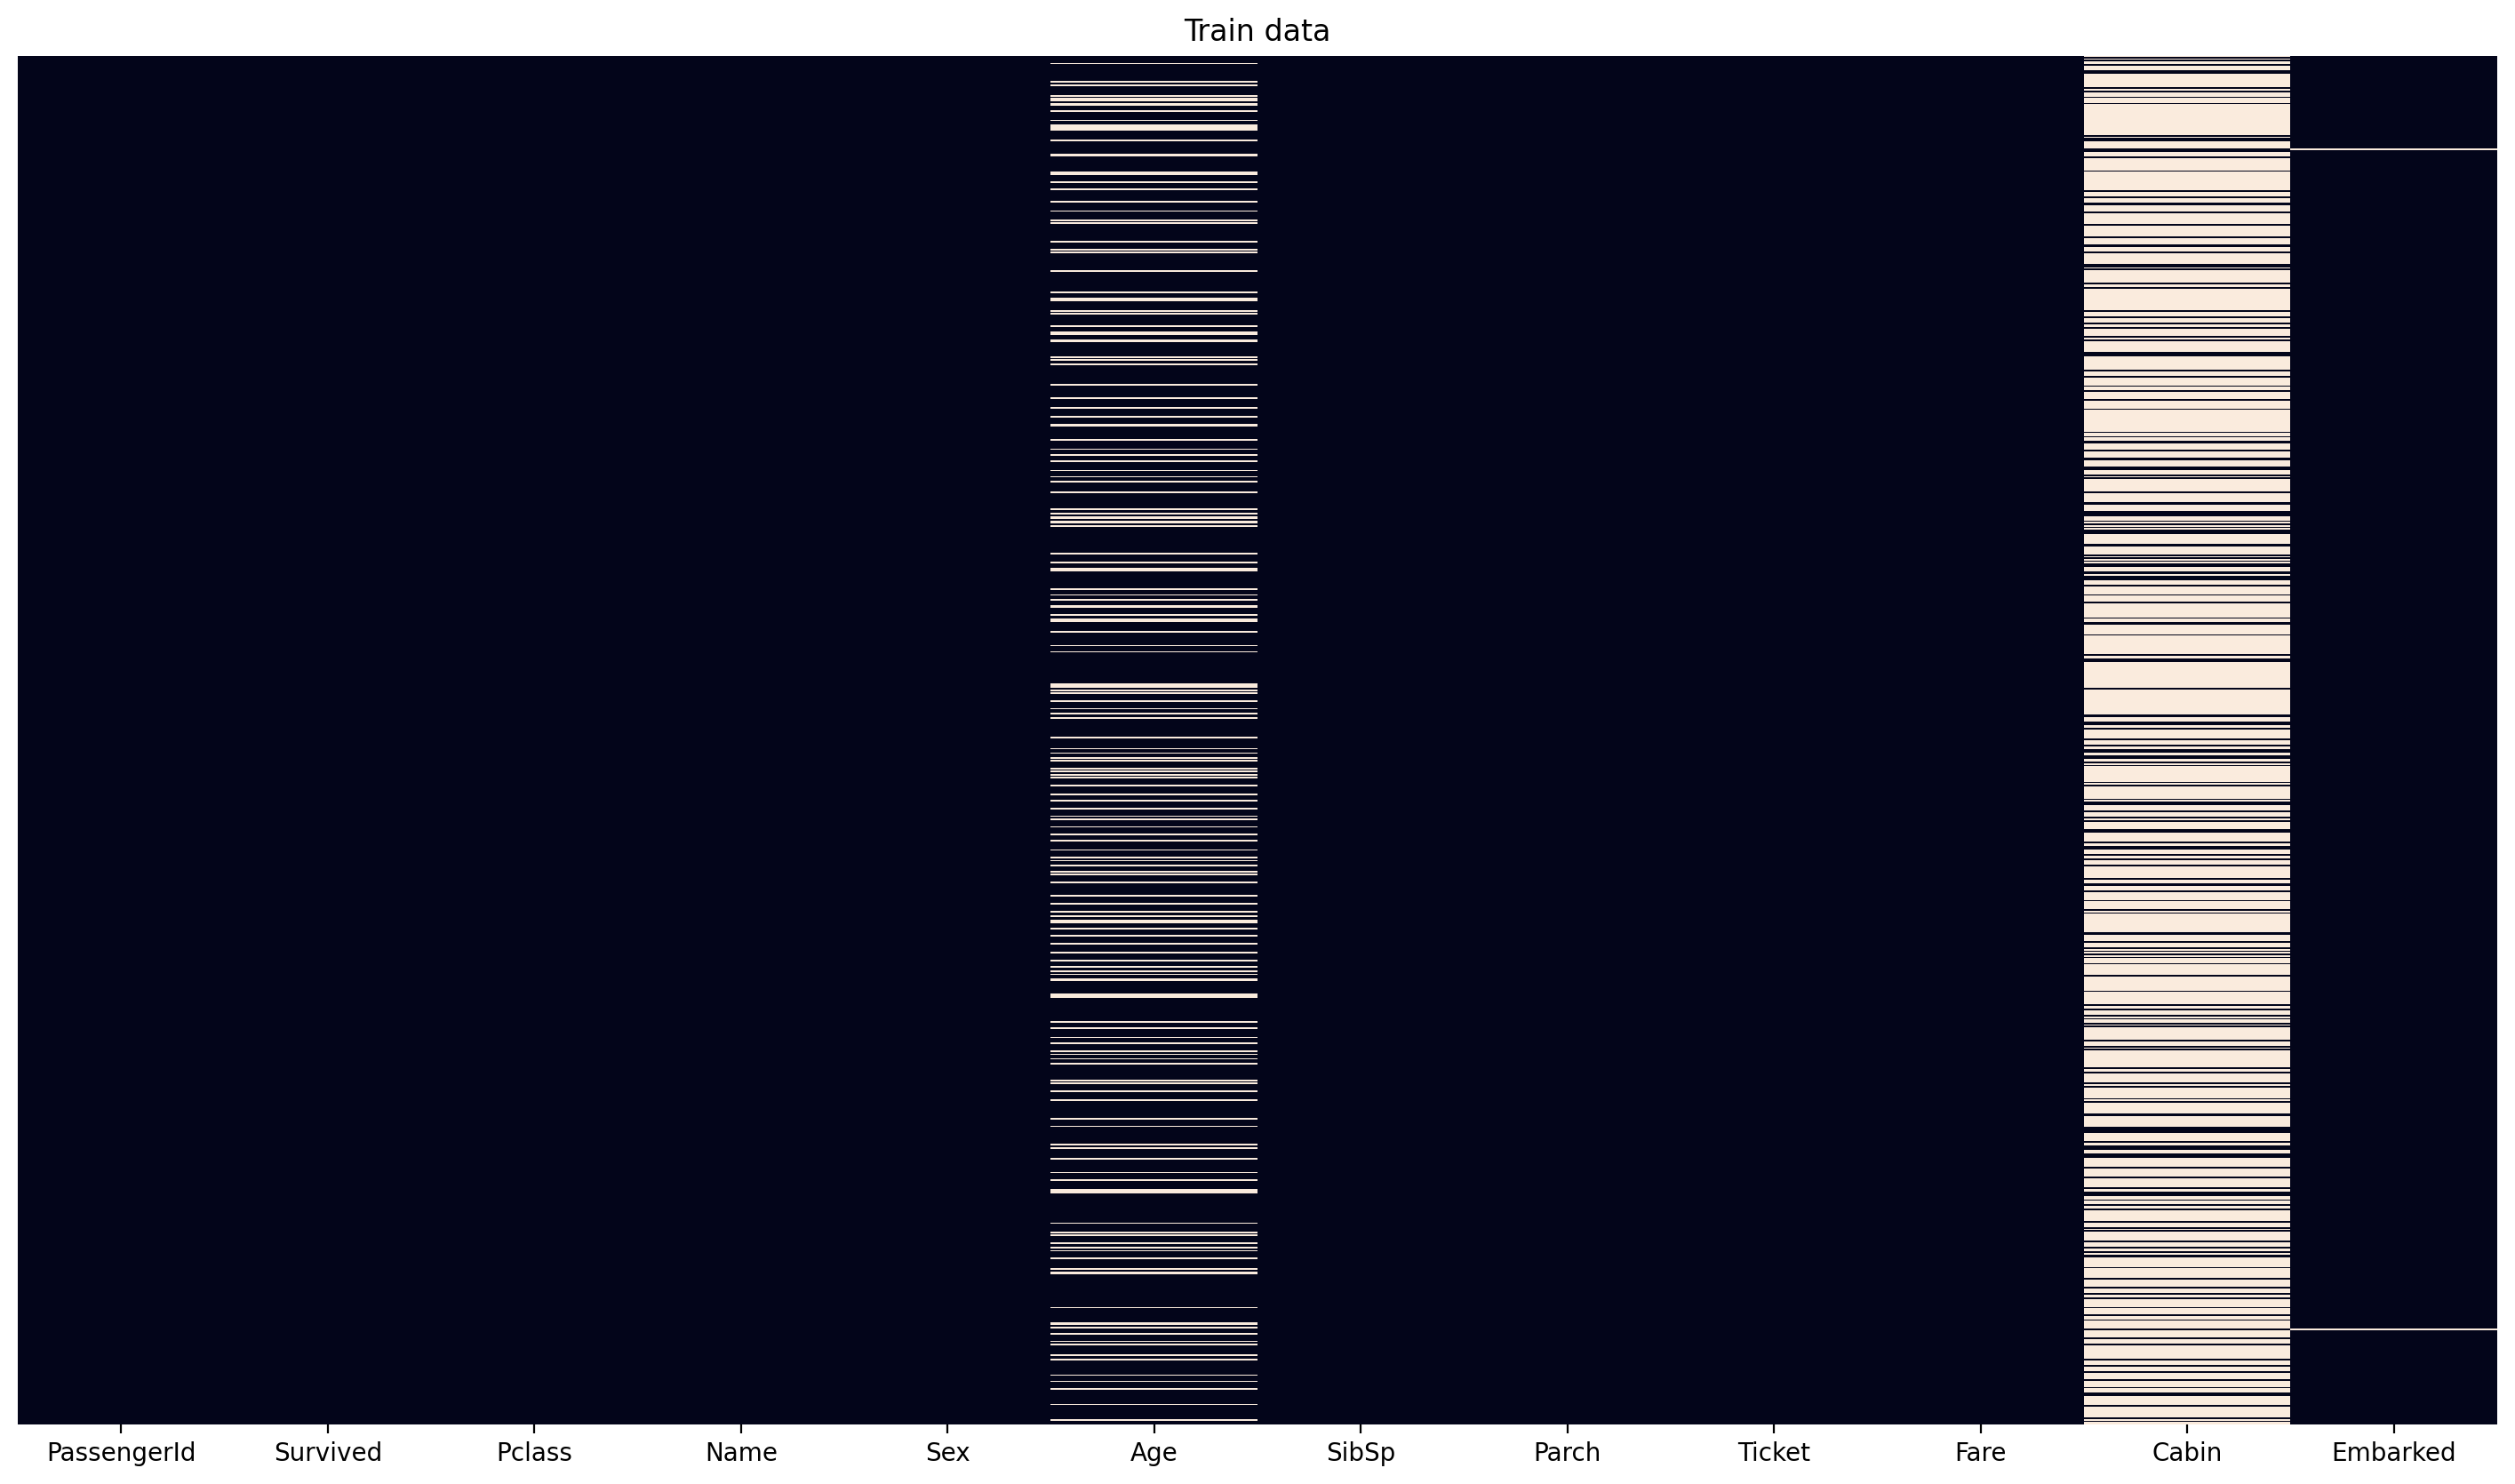

In [232]:
fig, ax = plt.subplots(figsize = (18, 10))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
ax.set_title('Train data');

- Cabin almost filled with NaNs

 **Heatmap for test Nulls**

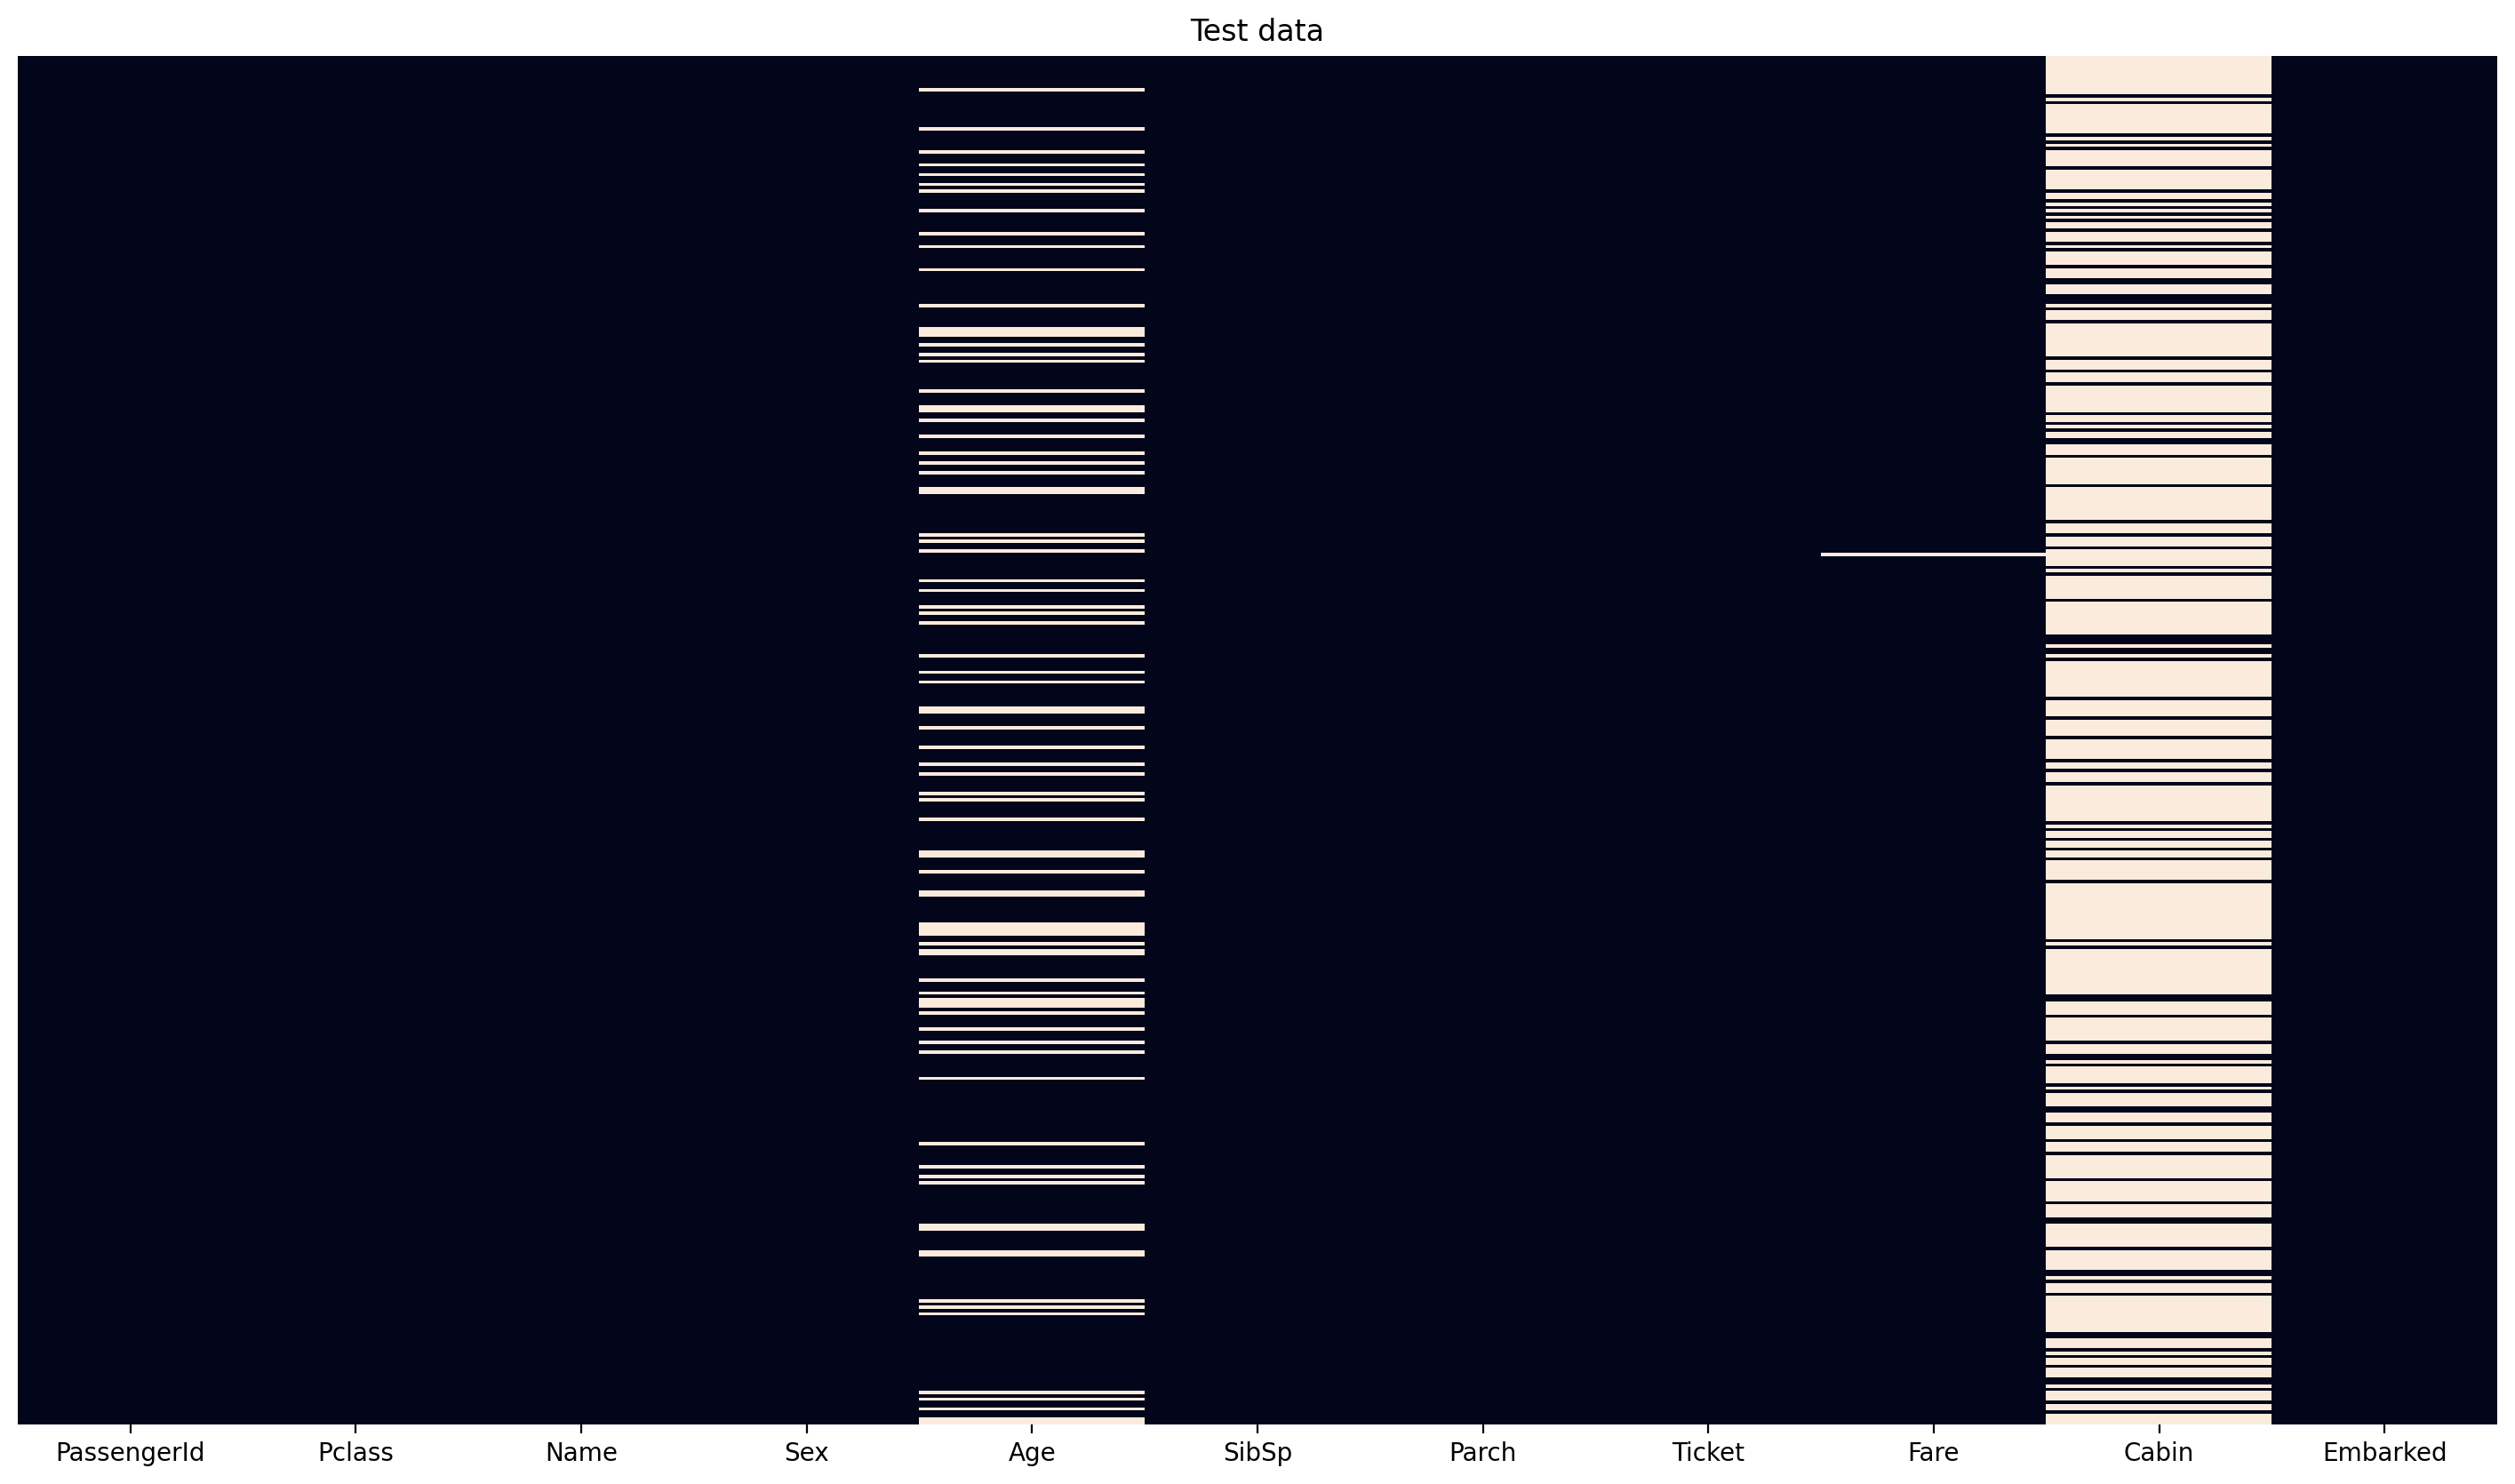

In [233]:
fig, ax = plt.subplots(figsize = (18, 10))

# test data 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
ax.set_title('Test data');

- Same here but we have one or two NaNs in Fare. 

In [234]:
#function to print the percent of NaN in each column
def perc_nan(df):
    # missing values as %
    percent = df.isnull().sum()*100 / df.shape[0]
    return  pd.concat([df.isnull().sum(), round(percent[percent > 0])],keys=["No_NaN","Percent"],
                                                                      axis=1).dropna().sort_values('Percent',
                                                                                                   ascending=False)

In [235]:
perc_nan(train)

,No_NaN,Percent
Cabin,687,77.0
Age,177,20.0
Embarked,2,0.0


- 77% for Cabin and it's the highest one.

In [236]:
perc_nan(test)

,No_NaN,Percent
Cabin,327,78.0
Age,86,21.0
Fare,1,0.0


- 78% NaNs on Cabin and it's the highest one.
- Fare has 1 NaN as we saw on heatmap.

---

In [237]:
#Create a list of columns name for both type of data
numeric_features = ['Age', 'Fare']
categor_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Let's visualize some fetures to inspect our data better.

## Plot categorical features aginst target

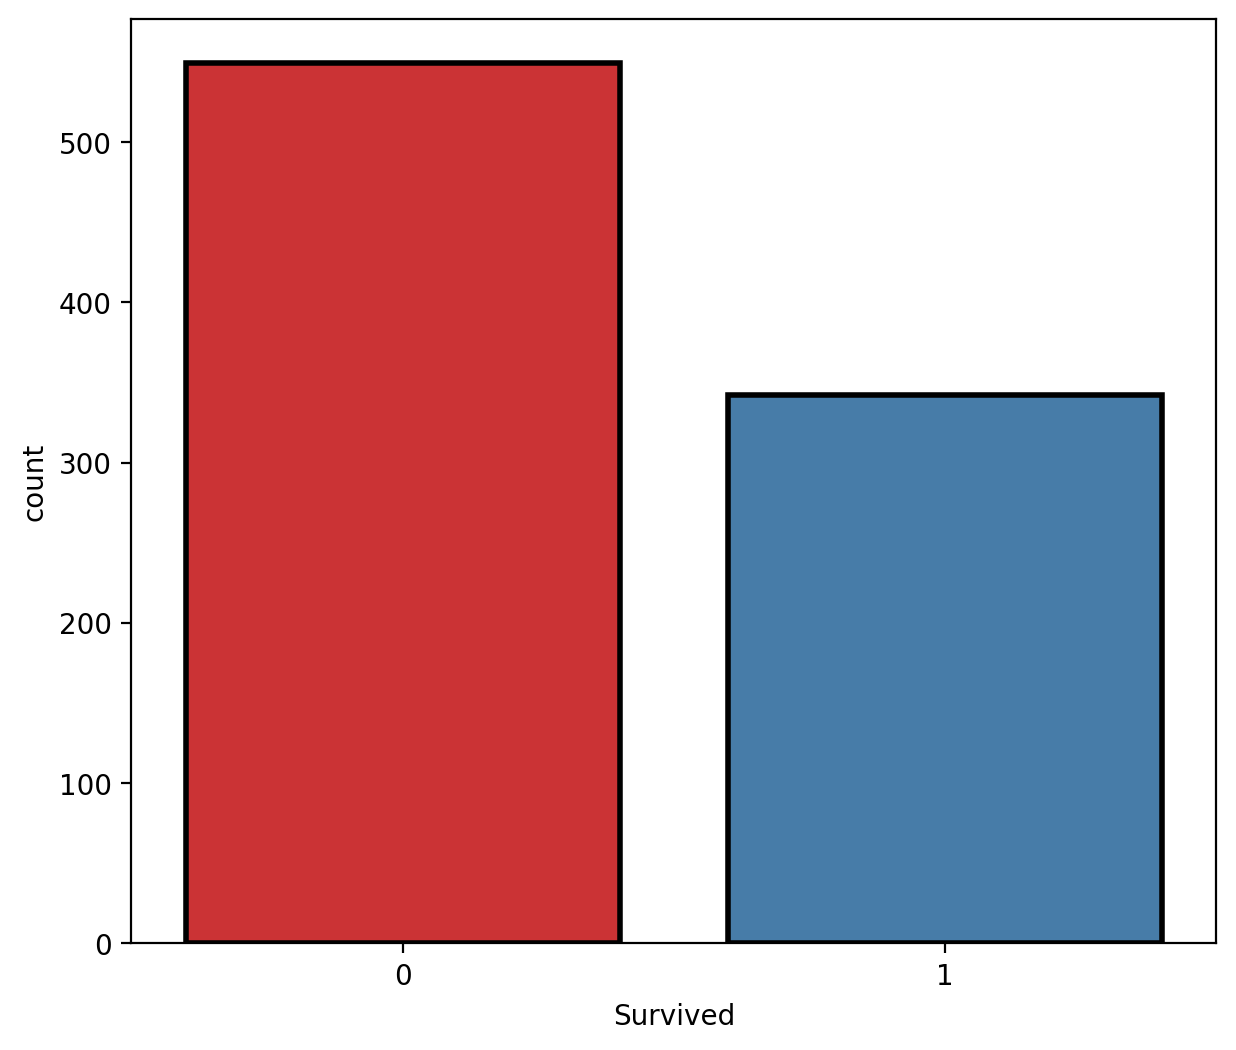

In [238]:
#Survivel with itself
plt.figure(figsize=(7,6))
sns.countplot(train.Survived, palette='Set1', edgecolor='black', linewidth=2)
plt.show()

- **Number of survivors are less than who did not.**

----------------------------------------------------------------------------
Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------------


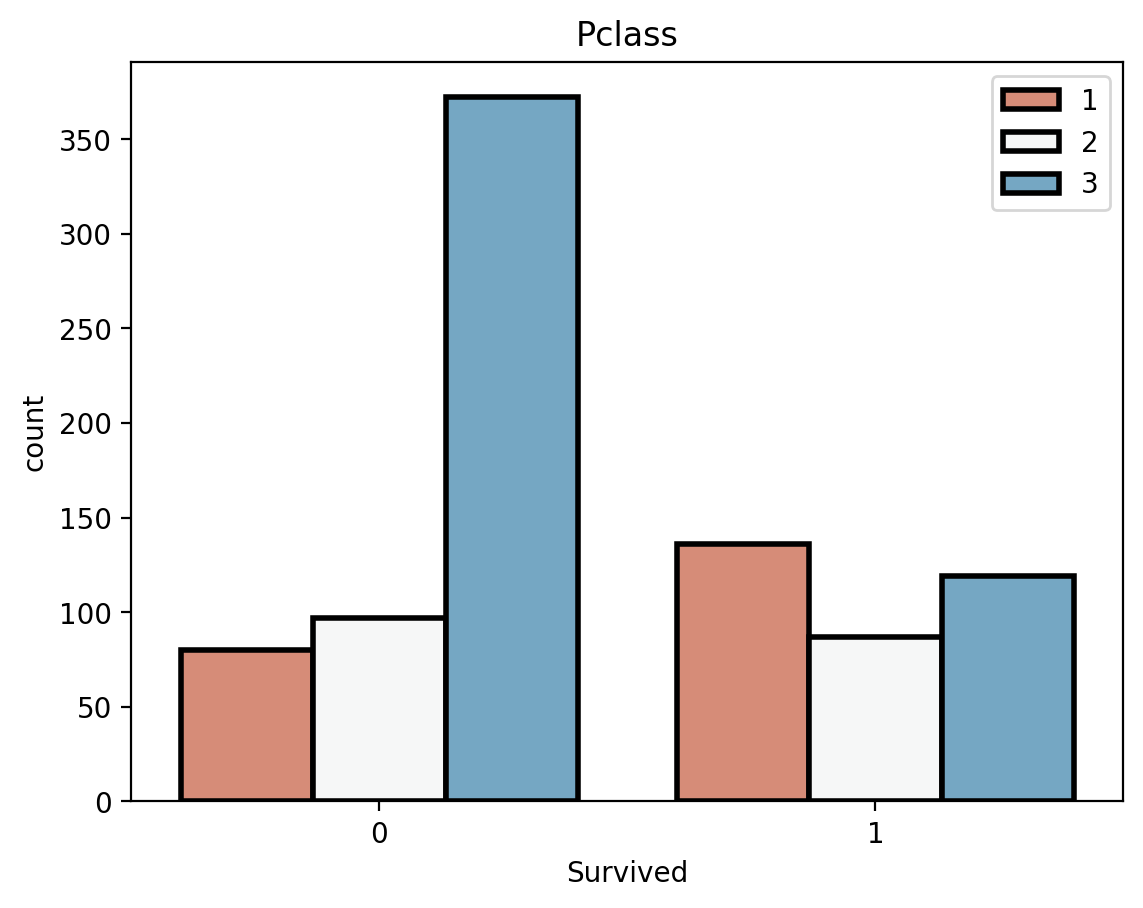

----------------------------------------------------------------------------
Sex: 
 male      577
female    314
Name: Sex, dtype: int64
----------------------------------------------------------------------------


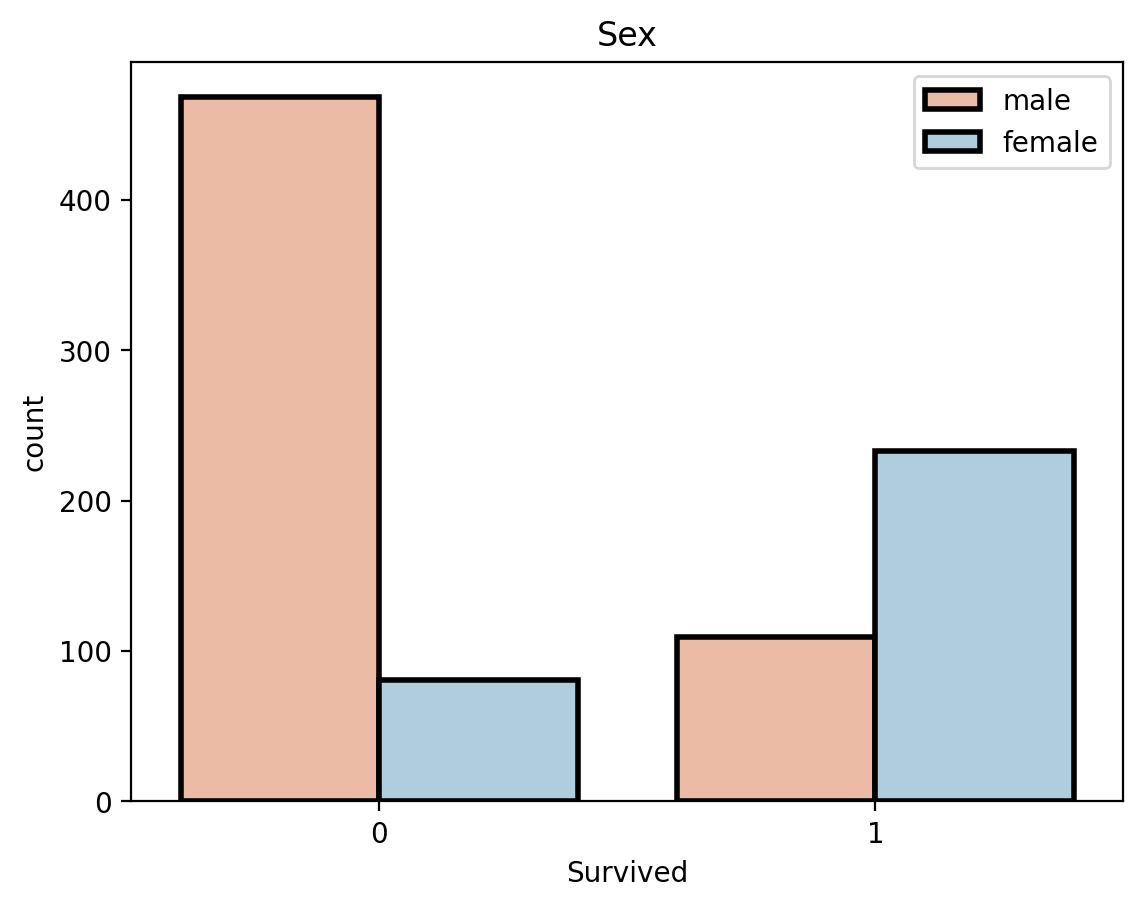

----------------------------------------------------------------------------
SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------------------------------------------------------


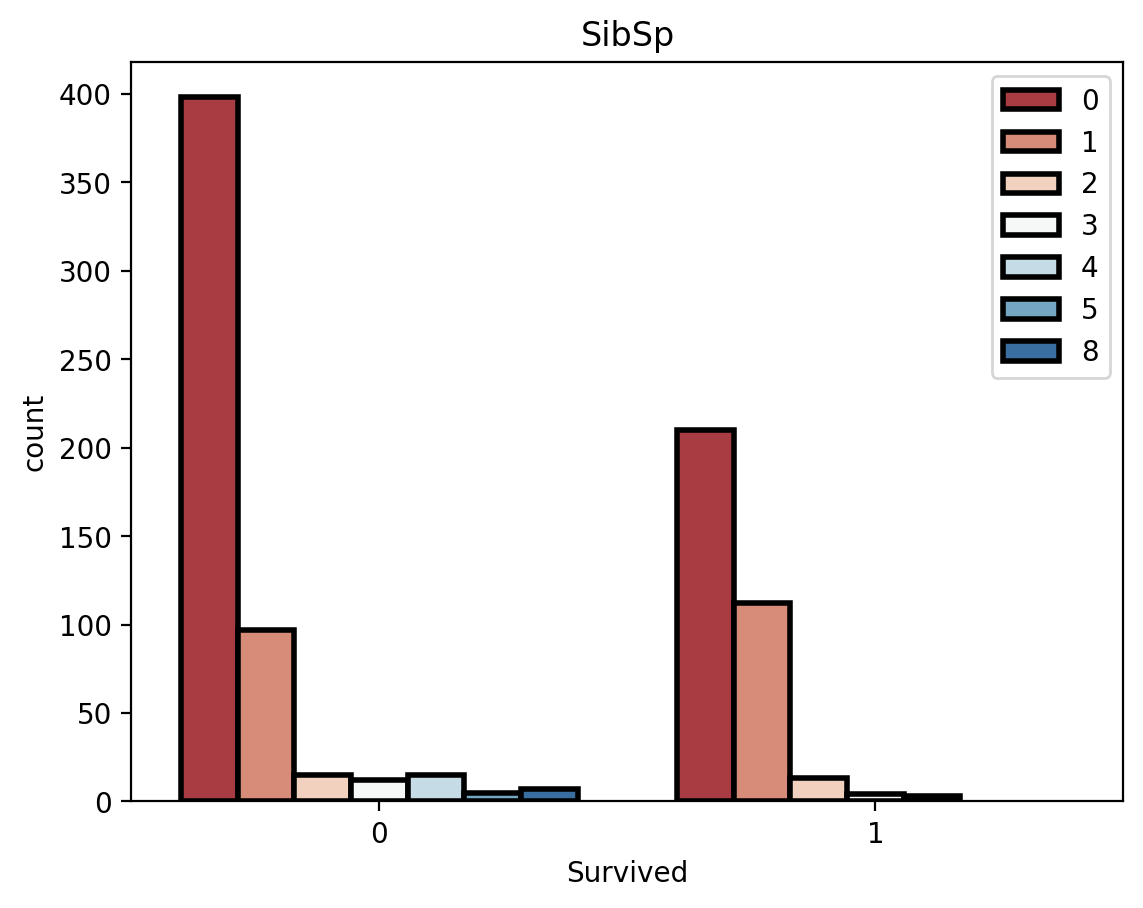

----------------------------------------------------------------------------
Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----------------------------------------------------------------------------


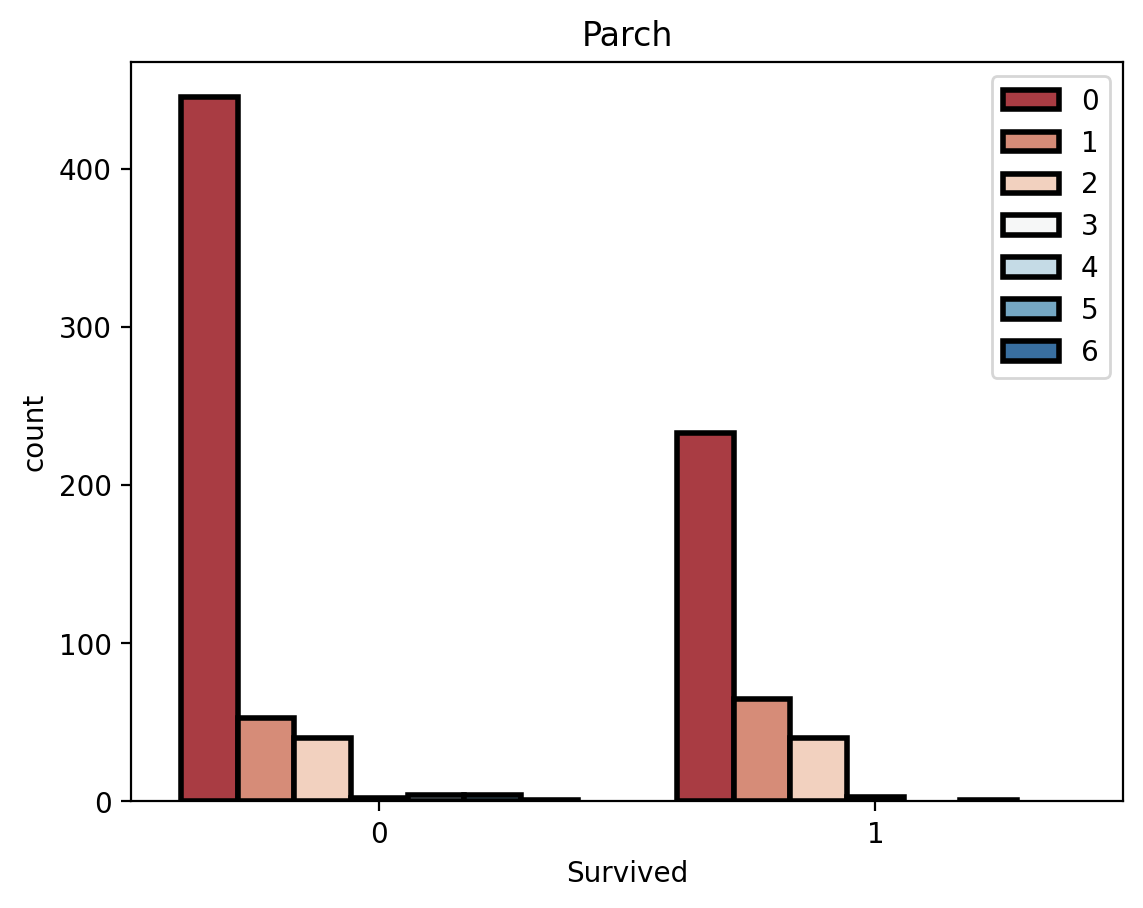

----------------------------------------------------------------------------
Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64
----------------------------------------------------------------------------


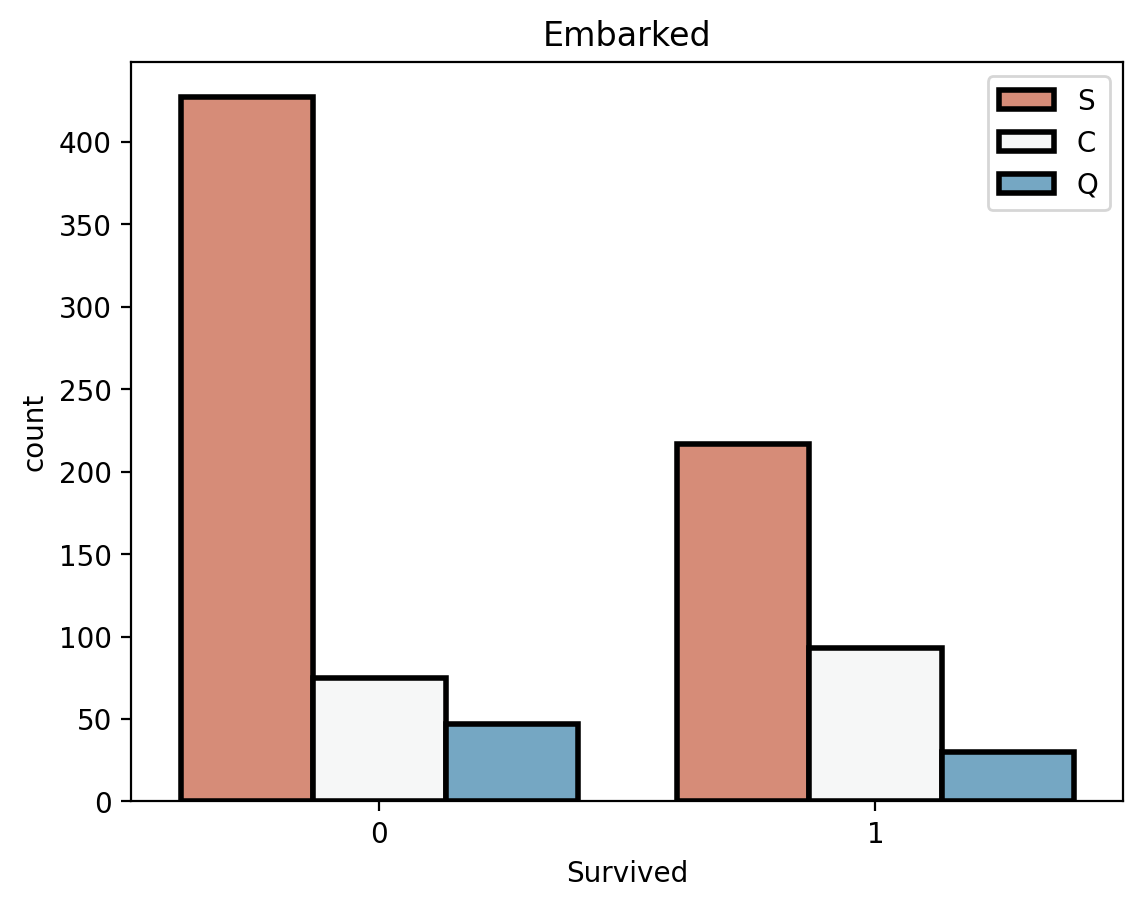

In [239]:
for column in categor_features:
    # for column in categor_features:
    sns.countplot(train.Survived, hue=train[column], palette='RdBu', edgecolor='black', linewidth=2)
    
    plt.title(column)
    plt.legend(loc=1)
    
    print('--'*38)
    print('{}: \n {}'.format(column, train[column].value_counts()))
    print('--'*38)
    
    plt.show()

- Pclass: Most of who didn't survived are from class 3 and the highest survivors from class 1.
- Sex: The majority of people who died are Males, and for whose lives are women's.
- SibSp: For people who died, most of them doesn't have siblings/spouses, and for whose survived the same.
- Parch:People died most with 0 Parents or Children, and highest people whose survived are without parents or children.
- Embarked: People from 'S' survived most and died the msot.
- Survived: Most people died in this case.

----

# Plot categorical features aginst Passengers

----------------------------------------------------------------------------
Pclass values:
Frequency:[184, 216, 491]
----------------------------------------------------------------------------


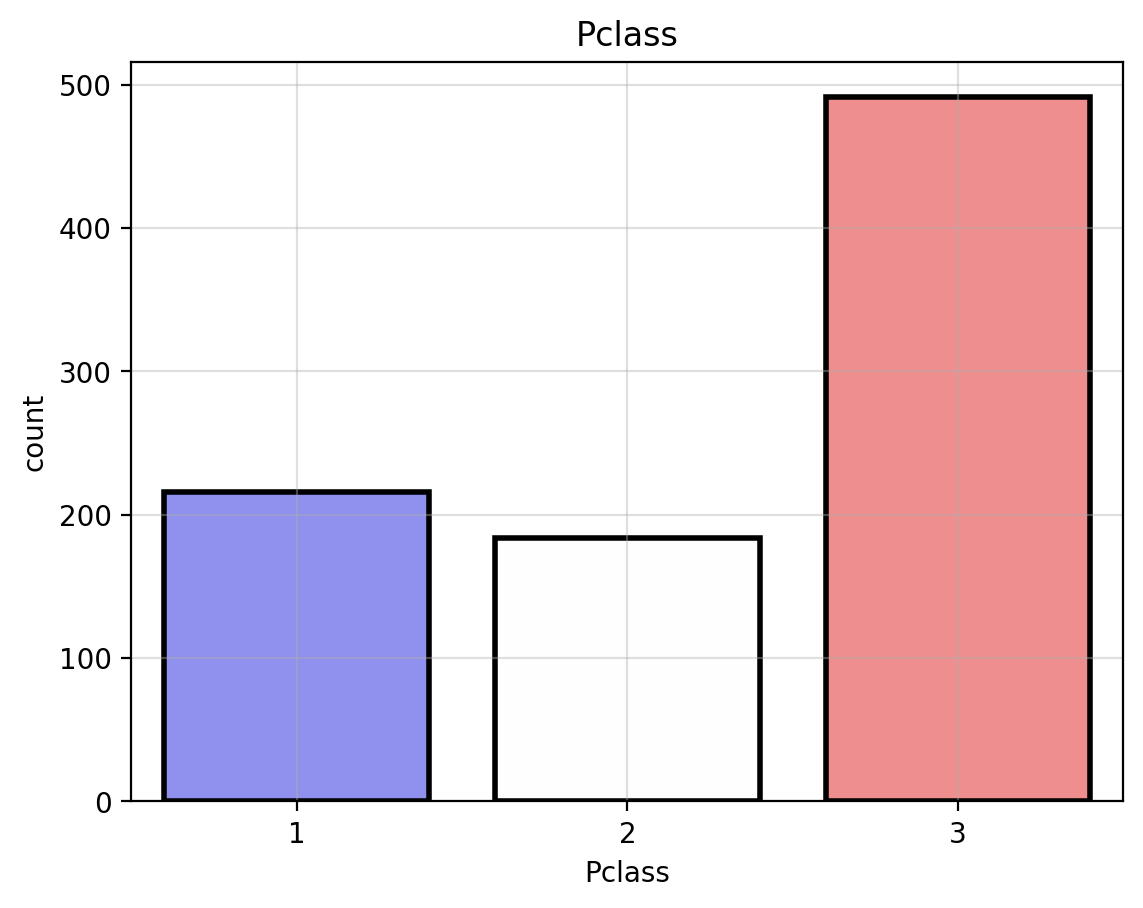

----------------------------------------------------------------------------
Sex values:
Frequency:[314, 577]
----------------------------------------------------------------------------


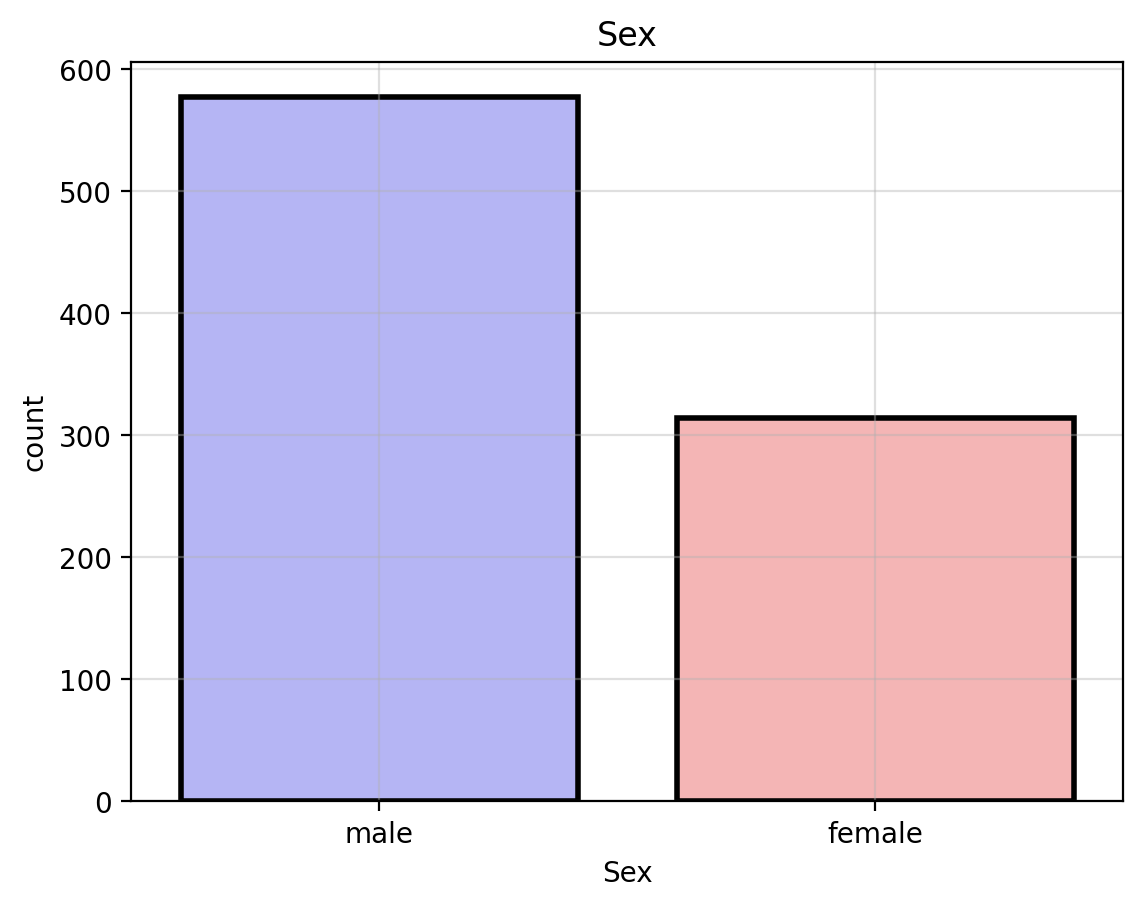

----------------------------------------------------------------------------
SibSp values:
Frequency:[5, 7, 16, 18, 28, 209, 608]
----------------------------------------------------------------------------


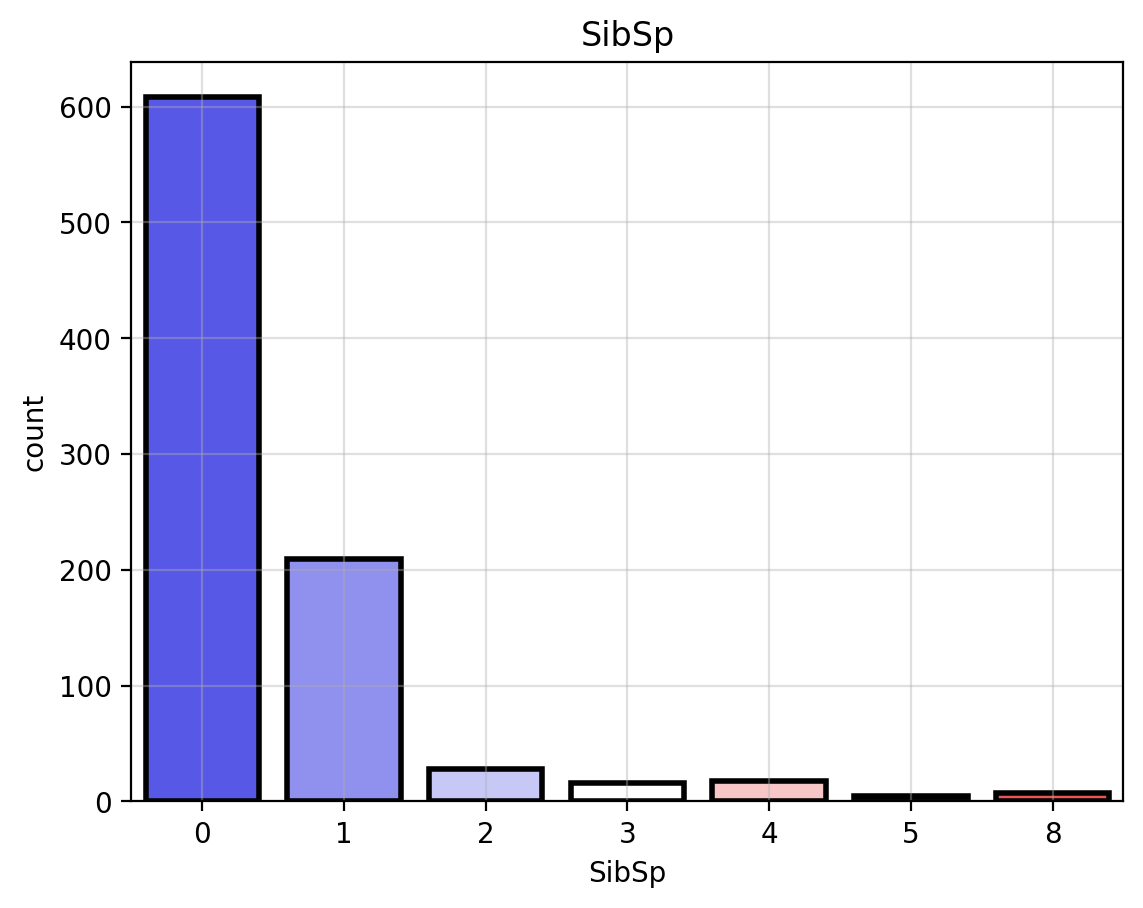

----------------------------------------------------------------------------
Parch values:
Frequency:[1, 4, 5, 5, 80, 118, 678]
----------------------------------------------------------------------------


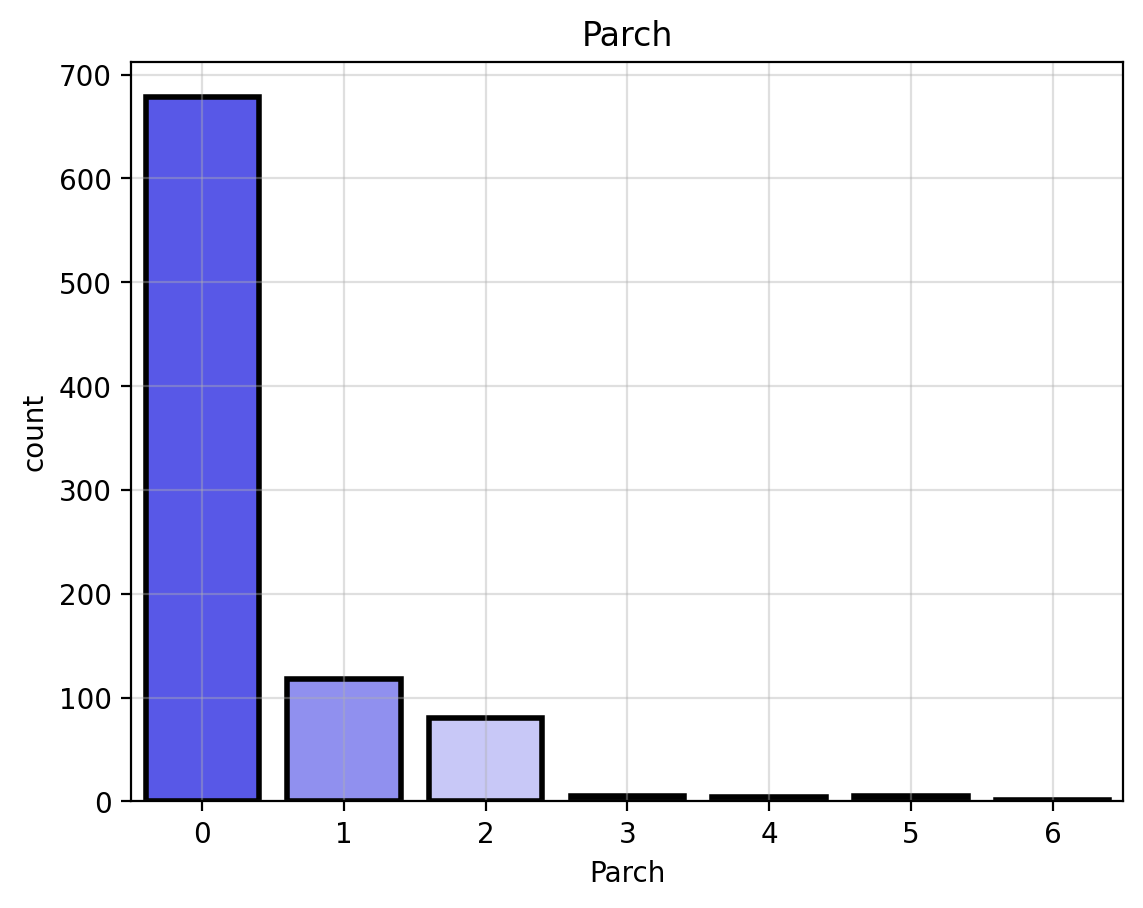

----------------------------------------------------------------------------
Embarked values:
Frequency:[77, 168, 644]
----------------------------------------------------------------------------


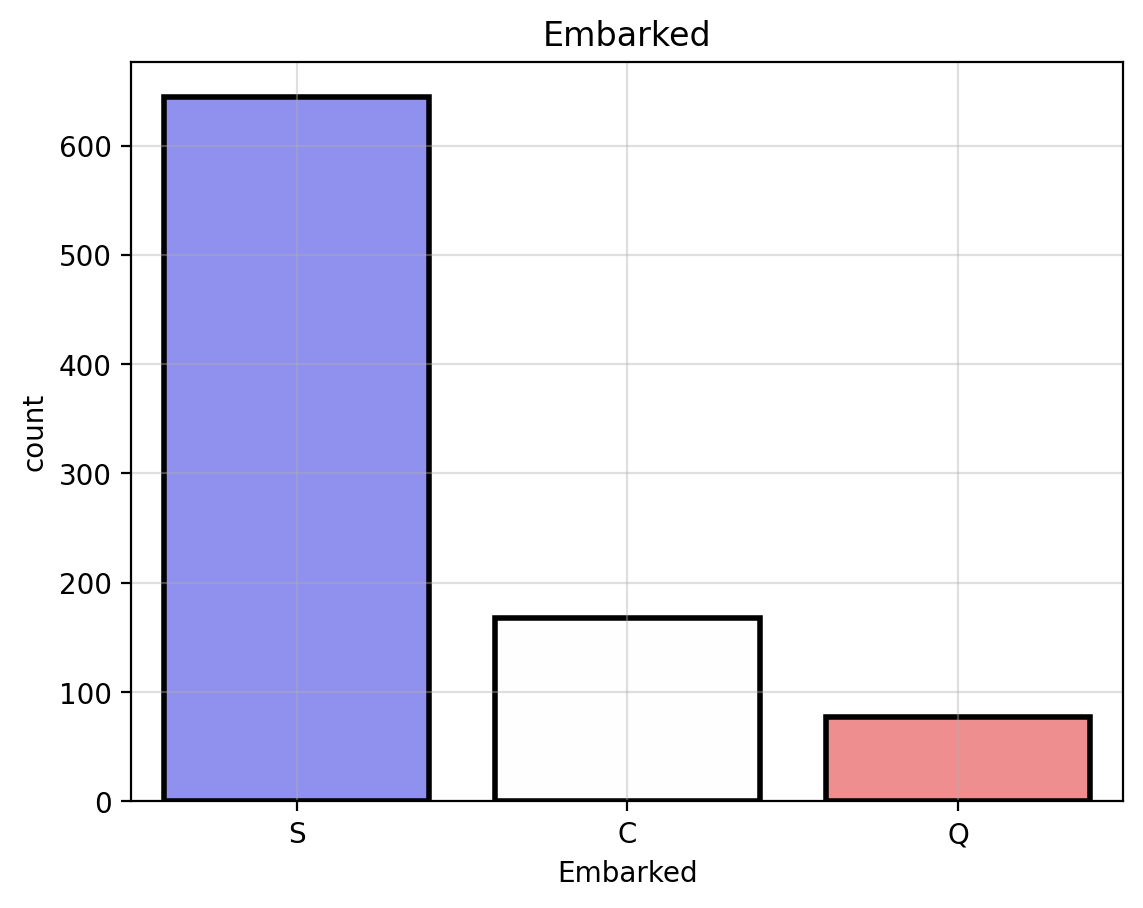

In [240]:
for feature in categor_features:
    sns.countplot(x=feature, data=train,  palette='bwr', edgecolor='black', linewidth=2) 
    
    plt.title(feature)
    print('--'*38)
    print(f'{feature} values:\nFrequency:{sorted(train[feature].value_counts())}')
    print('--'*38)
    plt.grid(alpha=0.4)
    plt.show()

- Most of the Passengers were on class 3.
- Most of the Passengers were Males.
- Most of the Passengers has no SibSp or Parch.
- Most of the Passengers came from S.

---

# Numeric features

# Distribution of numeric features

Skew = 0.38910778230082704


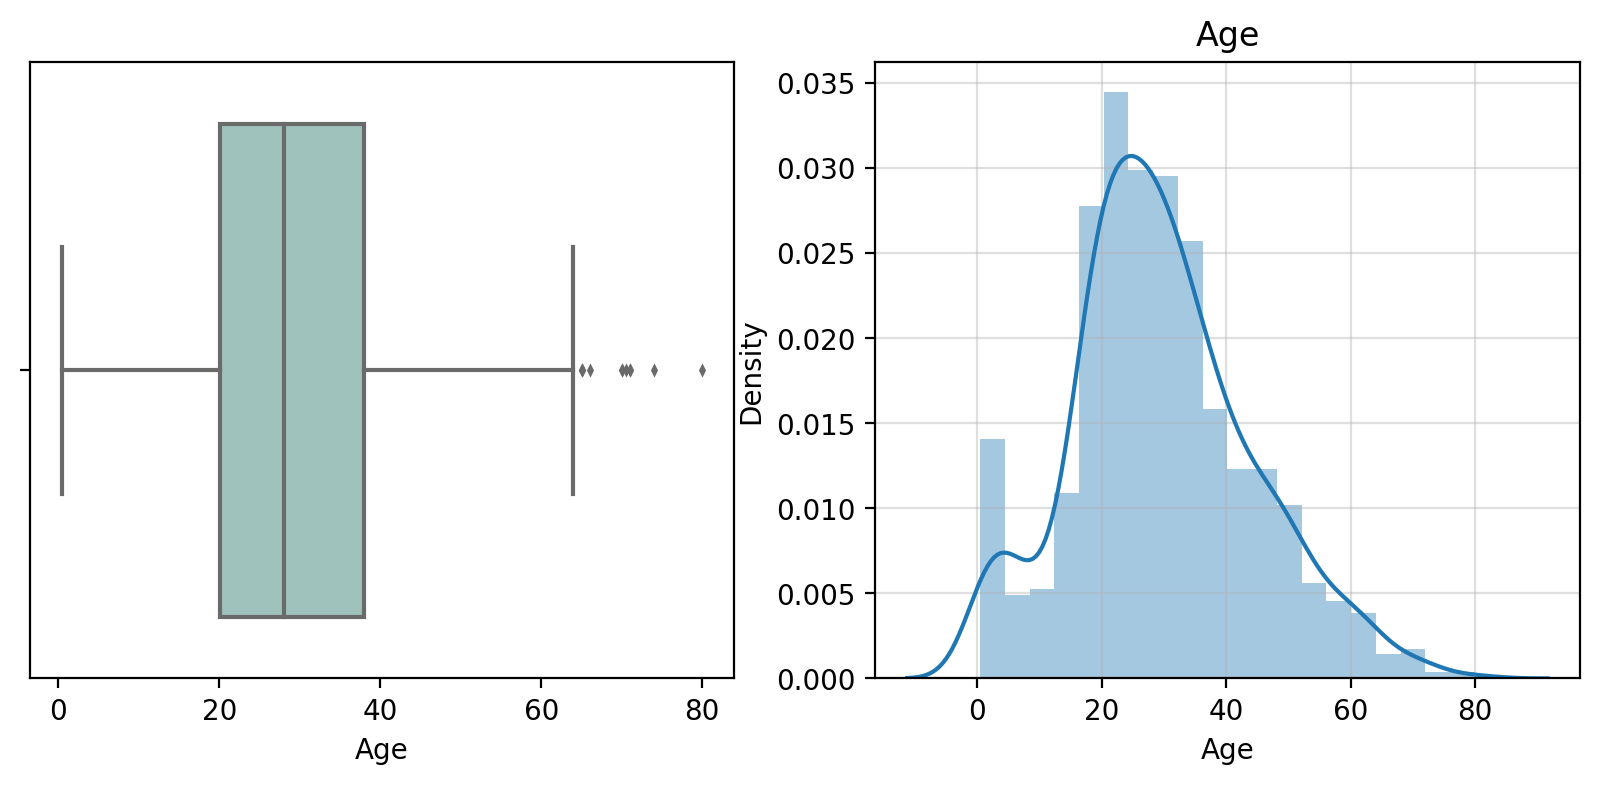

Skew = 4.787316519674893


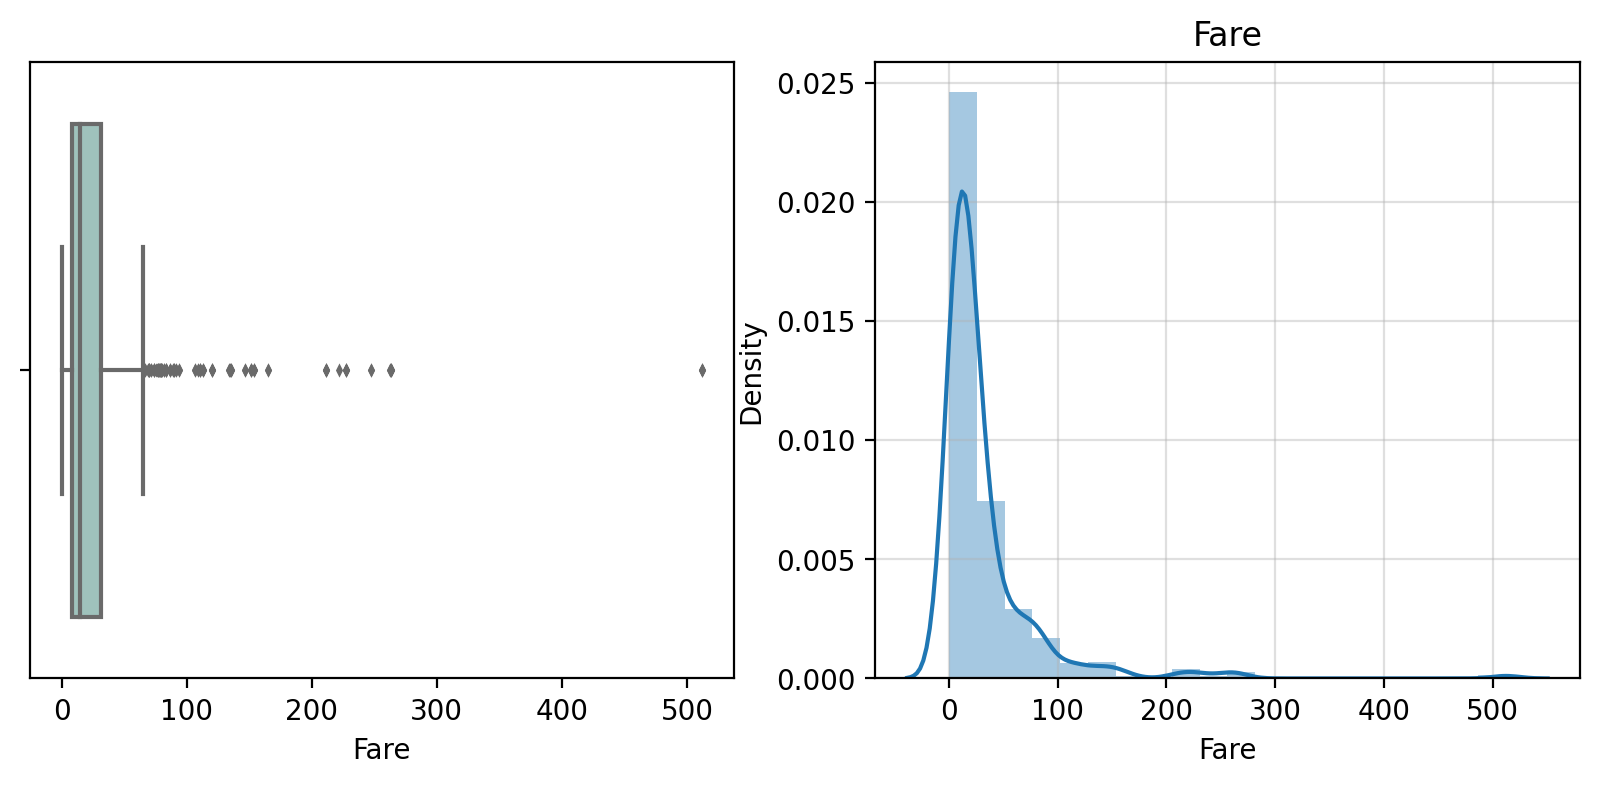

In [241]:
for feature in numeric_features:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.boxplot(x=train[feature], orient='v' ,fliersize=2, palette="Set3", linewidth=1.5, saturation=0.5, ax=axs[0])
    sns.distplot(train[feature], bins=20, kde=True, ax=axs[1])
    
    print('Skew =',train[feature].skew())
    
    plt.title(feature)
    plt.grid(alpha=0.4)
    
    plt.ticklabel_format(style='plain', axis='y') #Disable scientific notation;
    plt.show()

- Both of them have Outliers but Fare are the most due to different of prices for each Class. And Fare is strong right skewed.

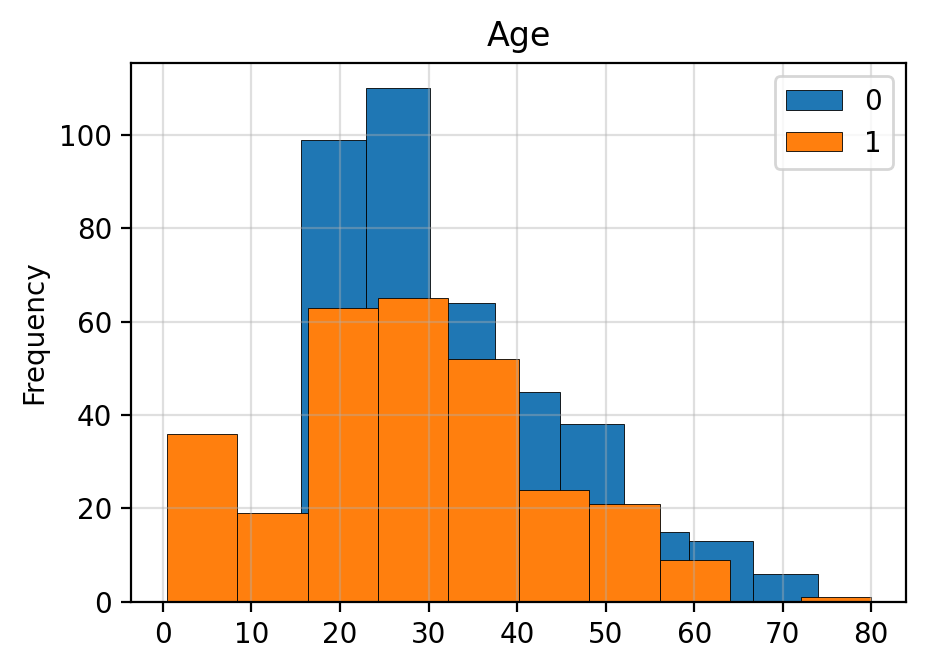

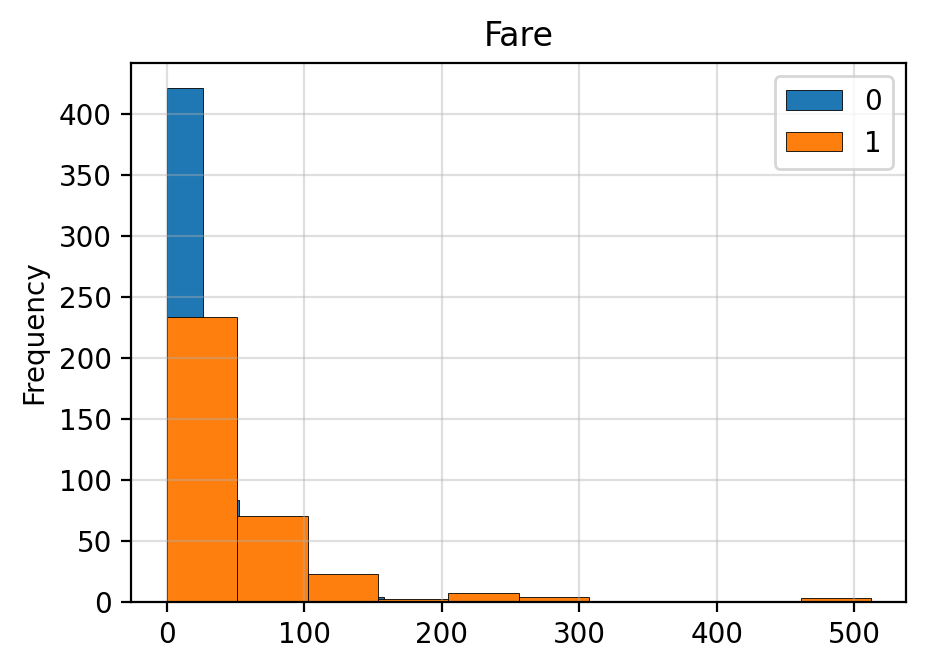

In [242]:
#Plot each numeric feature aginst Survived:

for each in numeric_features:
    #Deep copy of df - (Not by reference)
    df_copy = train.copy(deep=True)
    
    #Groupby the feature based on SalePrice median and plot
    plt.figure(figsize=(5,3.5))
    df_copy.groupby('Survived')[each].plot.hist(edgecolor='black', linewidth=0.3)

    plt.title(each)
    plt.grid(alpha=0.4)
    plt.ticklabel_format(style='plain', axis='y') #Disable scientific notation;
    plt.legend(['0','1'])
    plt.show

We can see the highest deaths for Age interfals was 20-30 years old. And those who paid less died most in Fare.

---

# Correlation

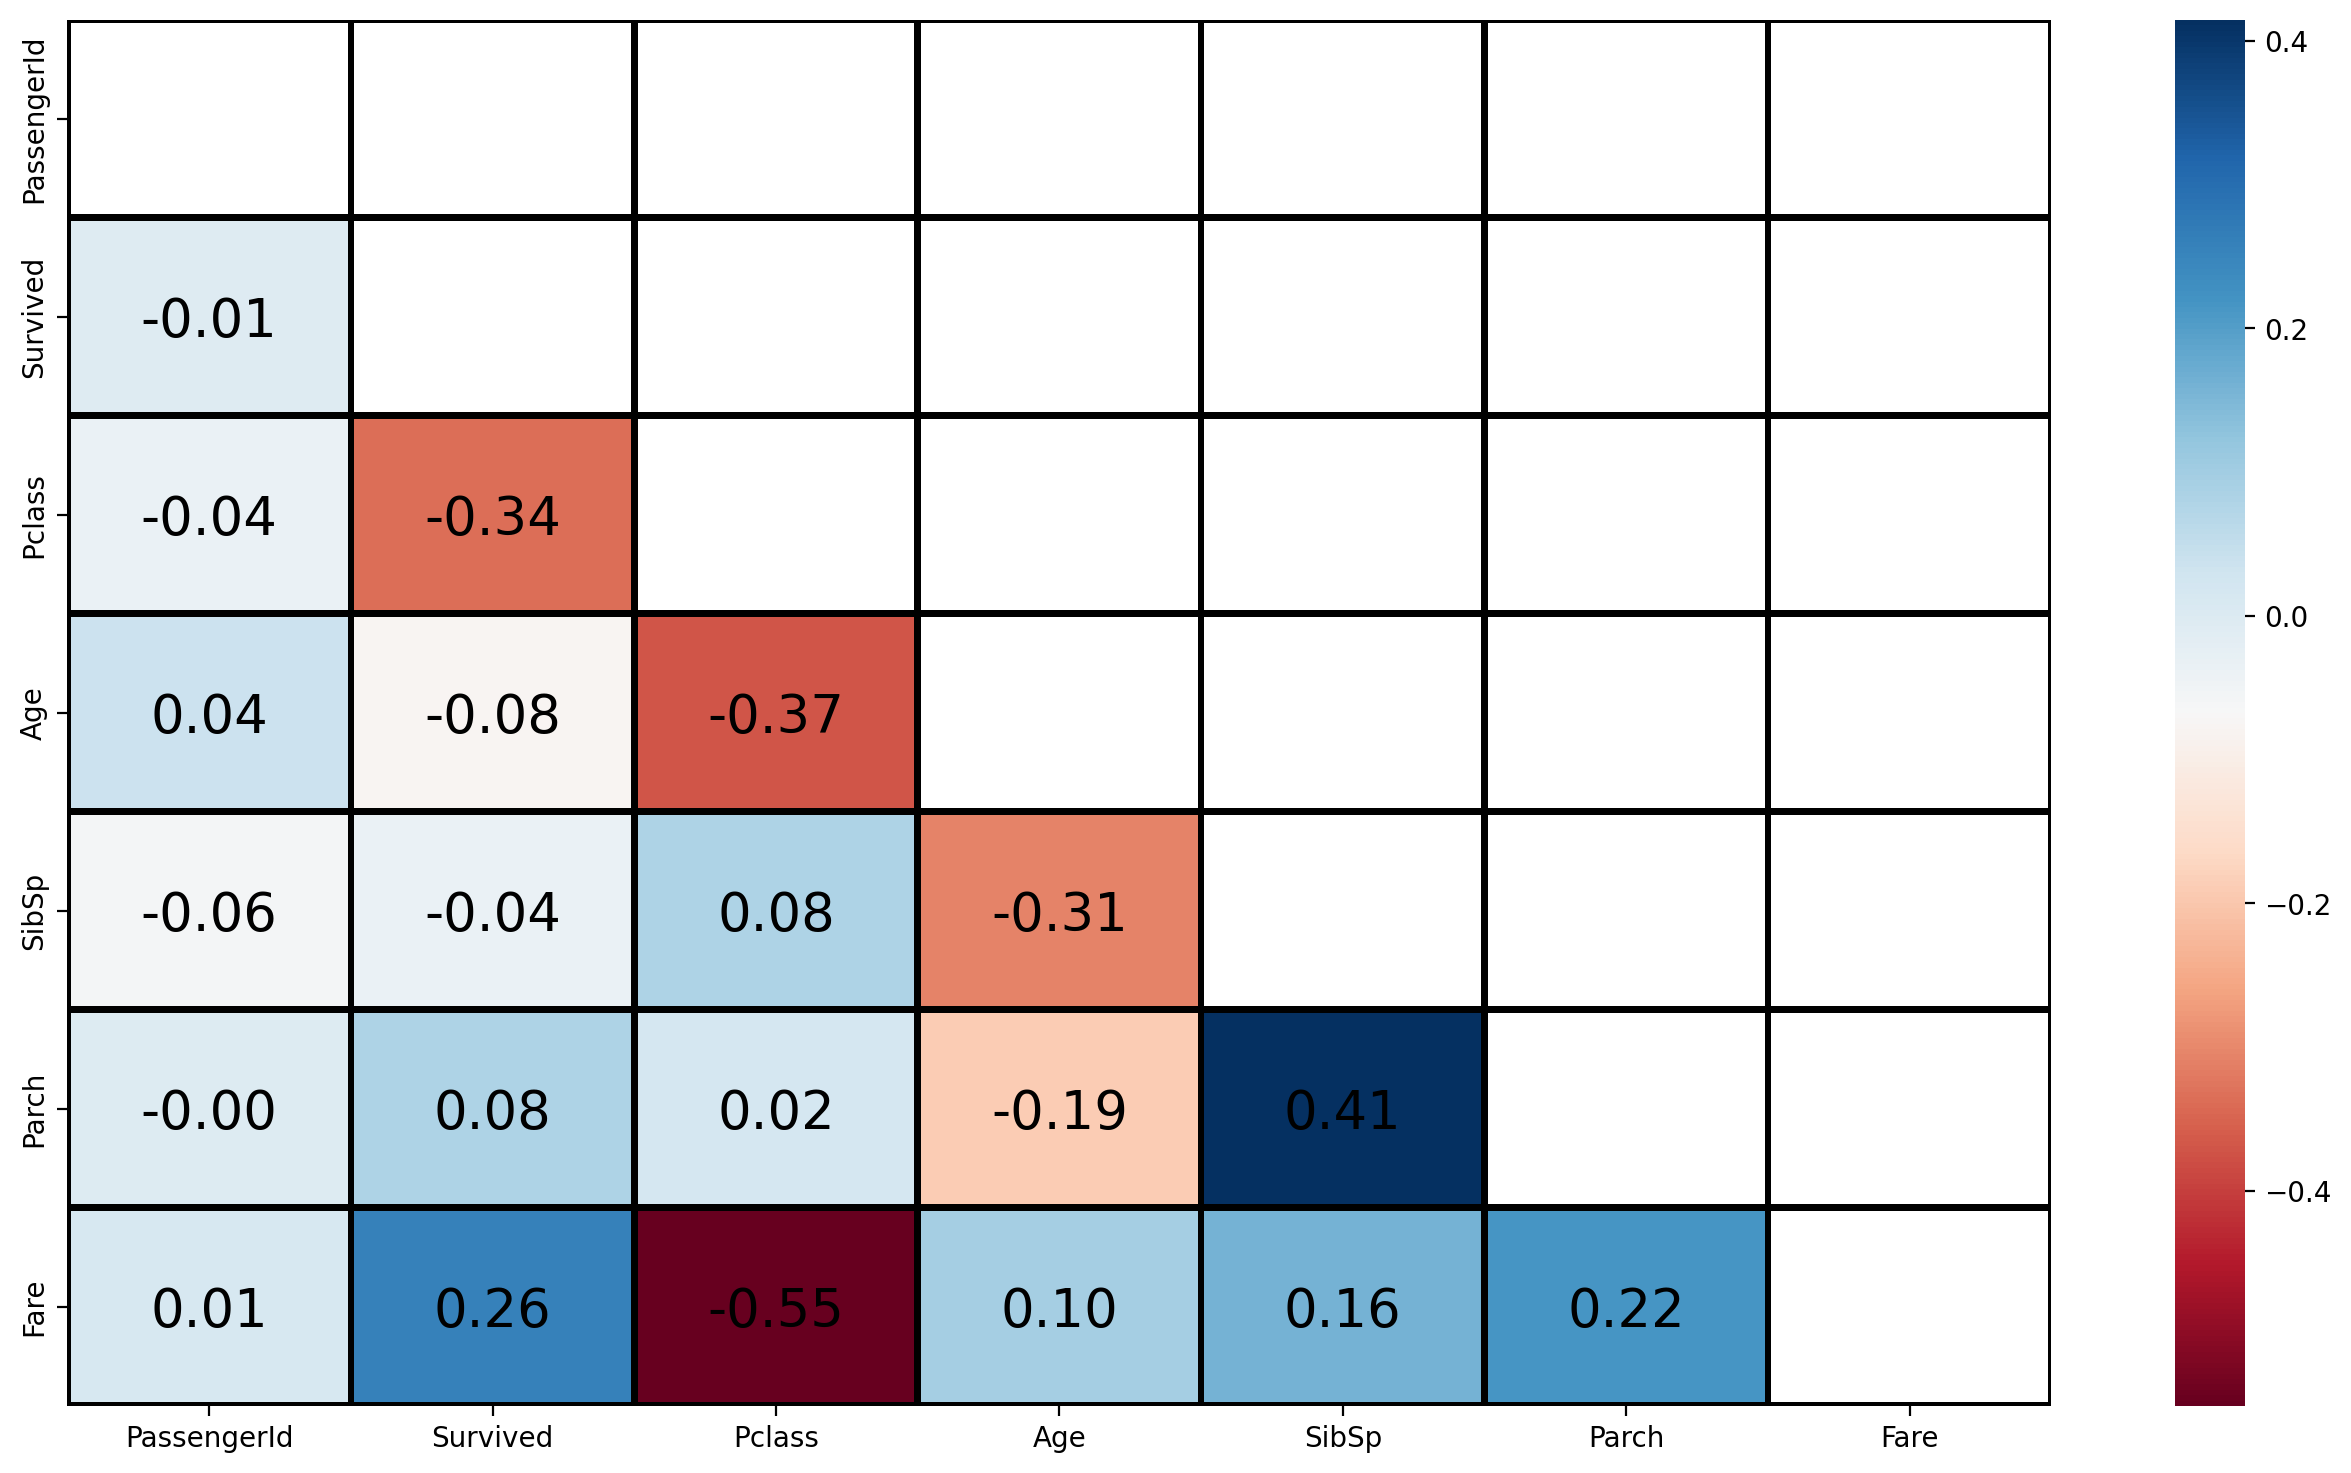

In [243]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_copy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Generate plot
plt.figure(figsize=(16,9))

#plot heatmap
sns.heatmap(train.corr(),
            annot=True,
            cmap= 'RdBu',
            annot_kws = {"size":19, "va": "center_baseline", "color":"black"}, 
            cbar_kws={"shrink": 1},
            linewidth=2,
            fmt=".2f",
            linecolor='black',
            mask=mask)

#set xtickles decoration
plt.xticks(horizontalalignment='center', fontsize=10)
plt.yticks(verticalalignment='center', fontsize=10);

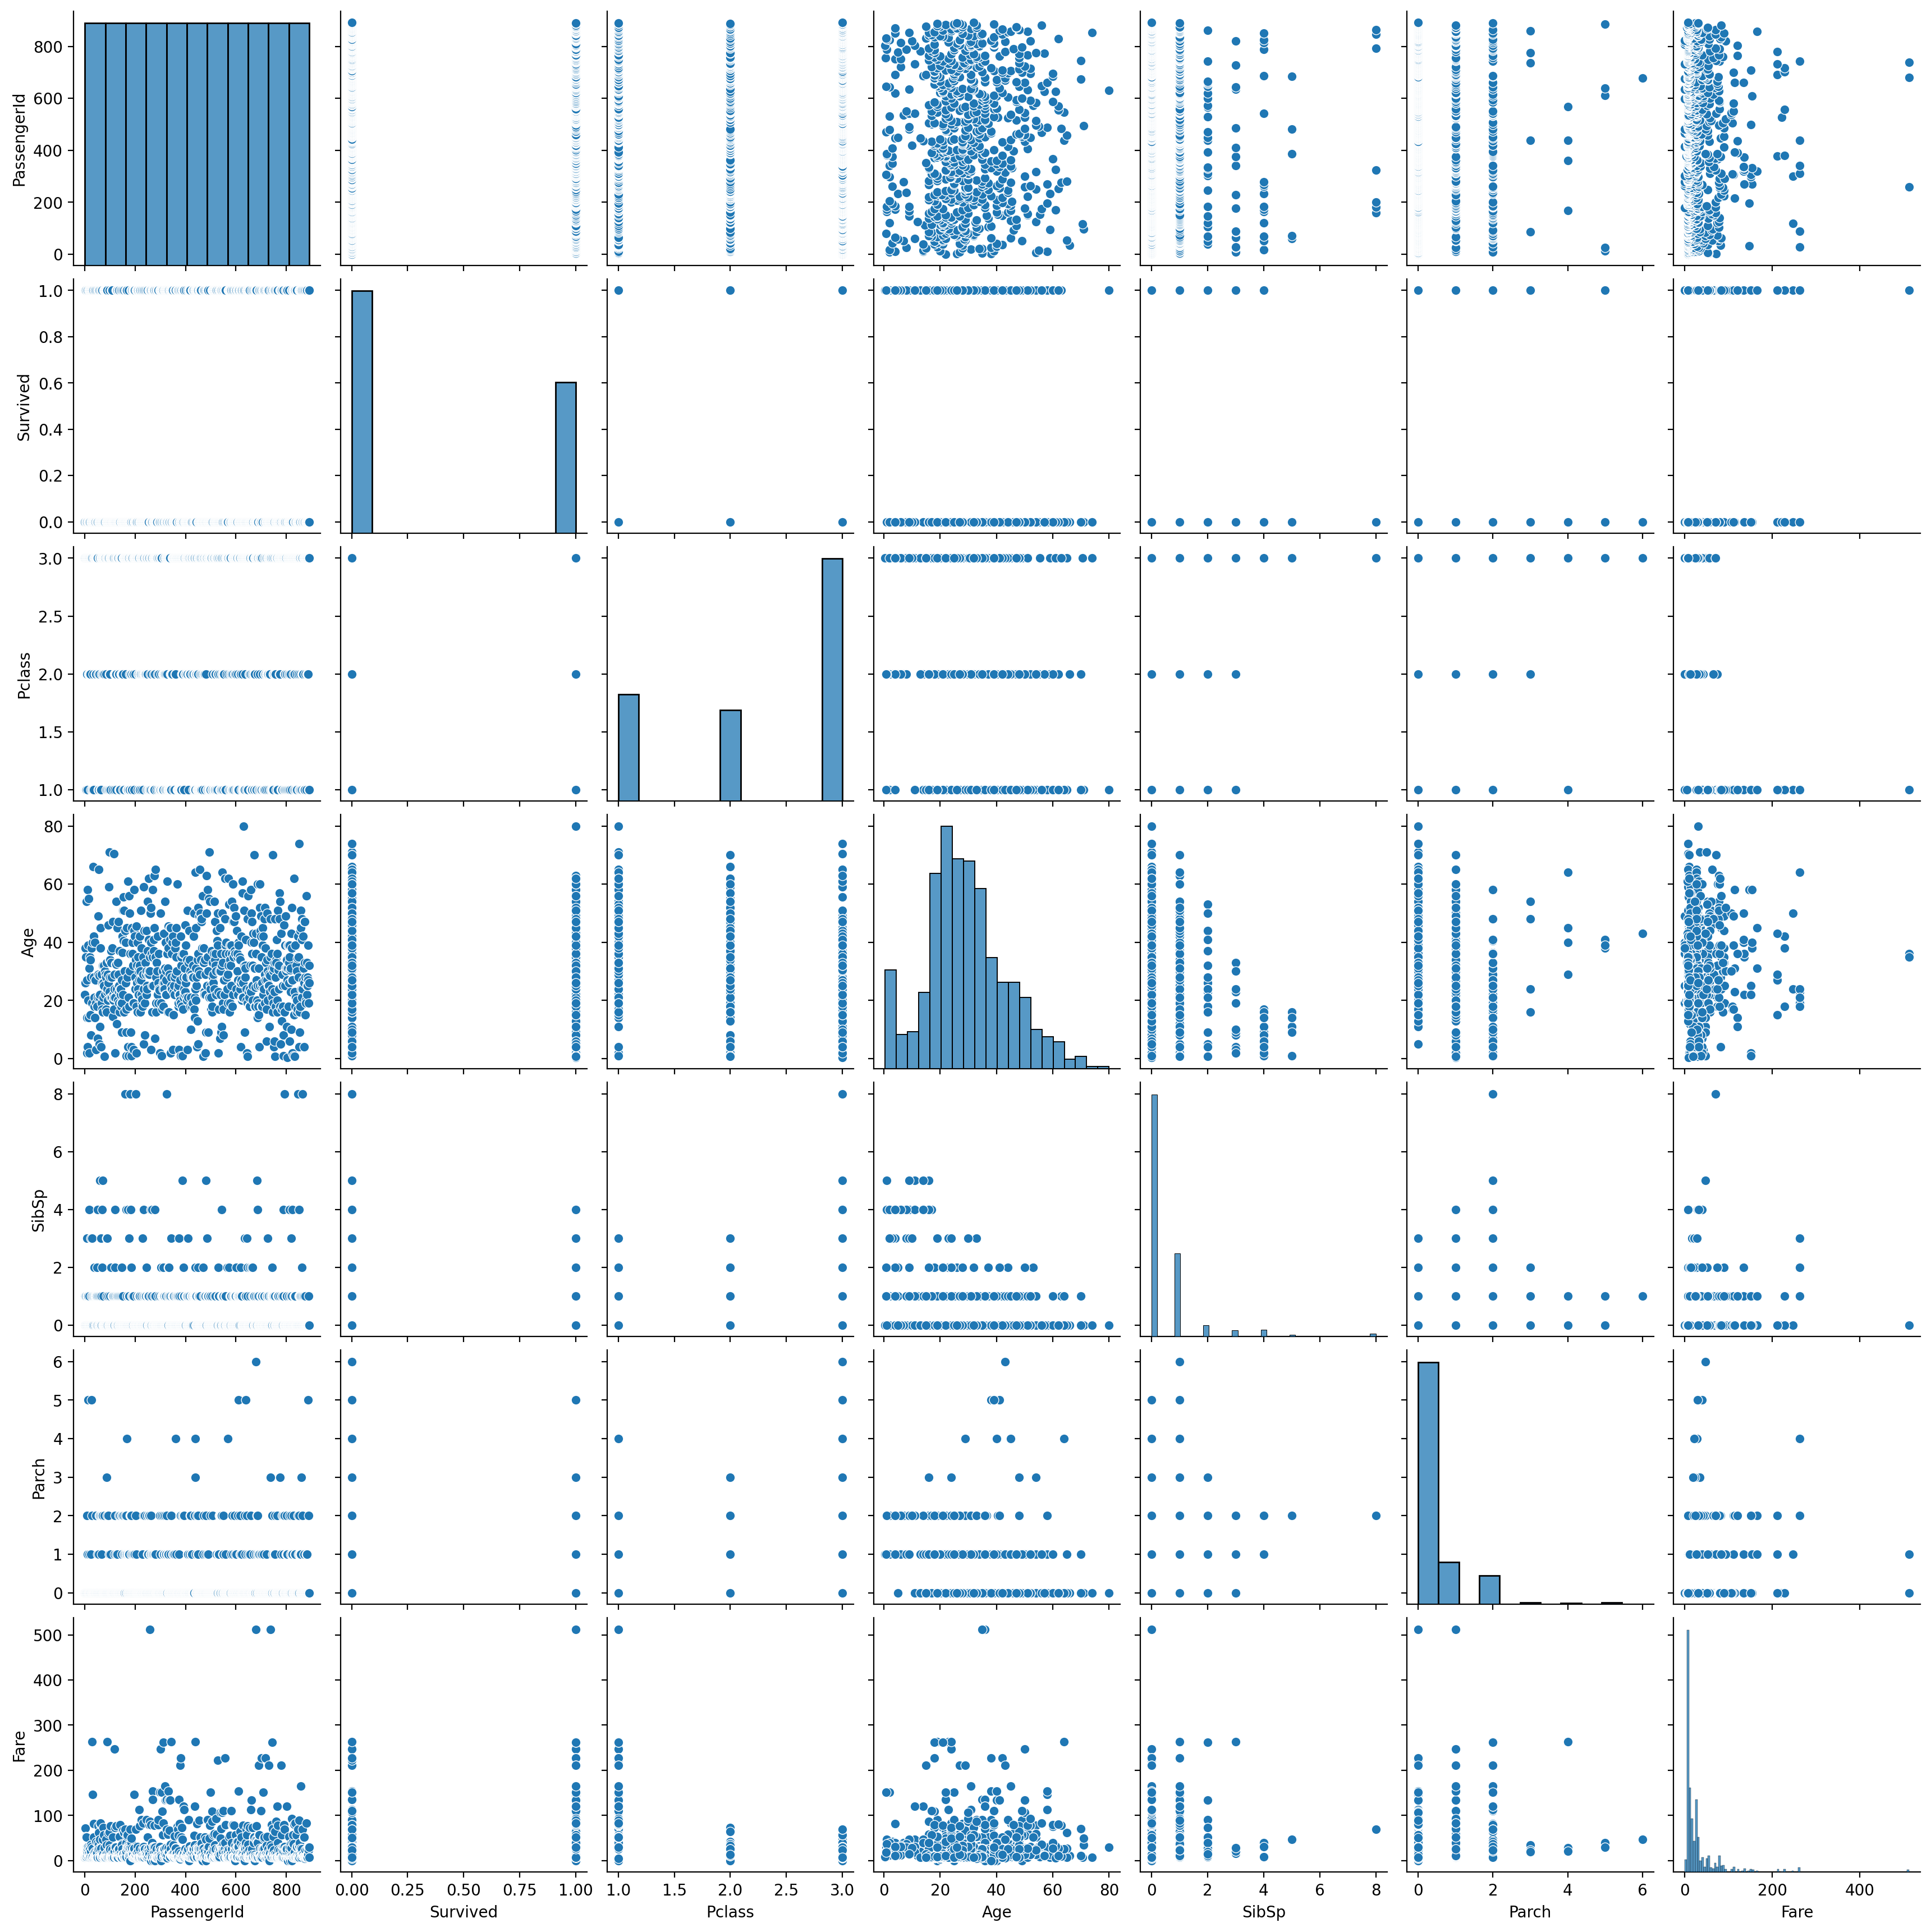

In [244]:
sns.pairplot(train)

- From the heatmap and pairplot we can see there is no strong postivie correlation between the features.
- Fare has a low positive correlation with Sruvived.
- Pclass has a high negative correlation.
- SibSp has a positive correlation with Parch

### Columns to be dropen:
    - PassengerId
    - Name
    - Ticket
    
### Relationship depending on survived:
    - S Embarked have the highest value in survived number.
    - Number of survived females is mutch more higher than male.
    - The survived passenger number and pclass have (-) relationship

----

# Data Preprocessing and Feature Engineering

# Goal
- Data Preprocessing and Feature Engineering

In [245]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [247]:
 train.shape, test.shape

((891, 12), (418, 11))

In [248]:
#Check the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [249]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


---

# Missing values

In [250]:
def perc_nan(df, feat_list):
    """
    This function will return the percent of nans and the number of nans with columns, Parms: dataframe, featurelist.
    """
    # missing values as %
    percent = df[feat_list].isnull().sum()*100 / df[feat_list].shape[0]
    
    #retur the concat between number of nans with the percent
    return pd.concat([df[feat_list].isnull().sum(), percent[percent > 0]],keys=["No_NaN",
                                                                                   "Percent"],
                                                                                    axis=1).dropna().sort_values('Percent',
                                                                                                                 ascending=False)

In [251]:
#NaNs in train
perc_nan(train, train.columns)

,No_NaN,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [252]:
#NaNs in test
perc_nan(test, test.columns)

,No_NaN,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


**Combine the two datasets to work at the same time and then split themn again**

In [253]:
#Get target on y
y = train["Survived"]

#concat train and test
combined_df = pd.concat([train, test], axis=0).reset_index(drop=True)

#drop sale price and id we don't need them
combined_df = combined_df.drop(["PassengerId","Survived"],axis=1)

combined_df.shape

(1309, 10)

In [254]:
combined_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# NaNs for object features

In [255]:
#Get the categ features
object_feature = [x for x in combined_df.columns if combined_df[x].isna().sum()>0 and combined_df[x].dtypes == 'O']
object_feature

['Cabin', 'Embarked']

In [256]:
#NaNs percent per feature
perc_nan(combined_df, object_feature)

,No_NaN,Percent
Cabin,1014,77.463713
Embarked,2,0.152788


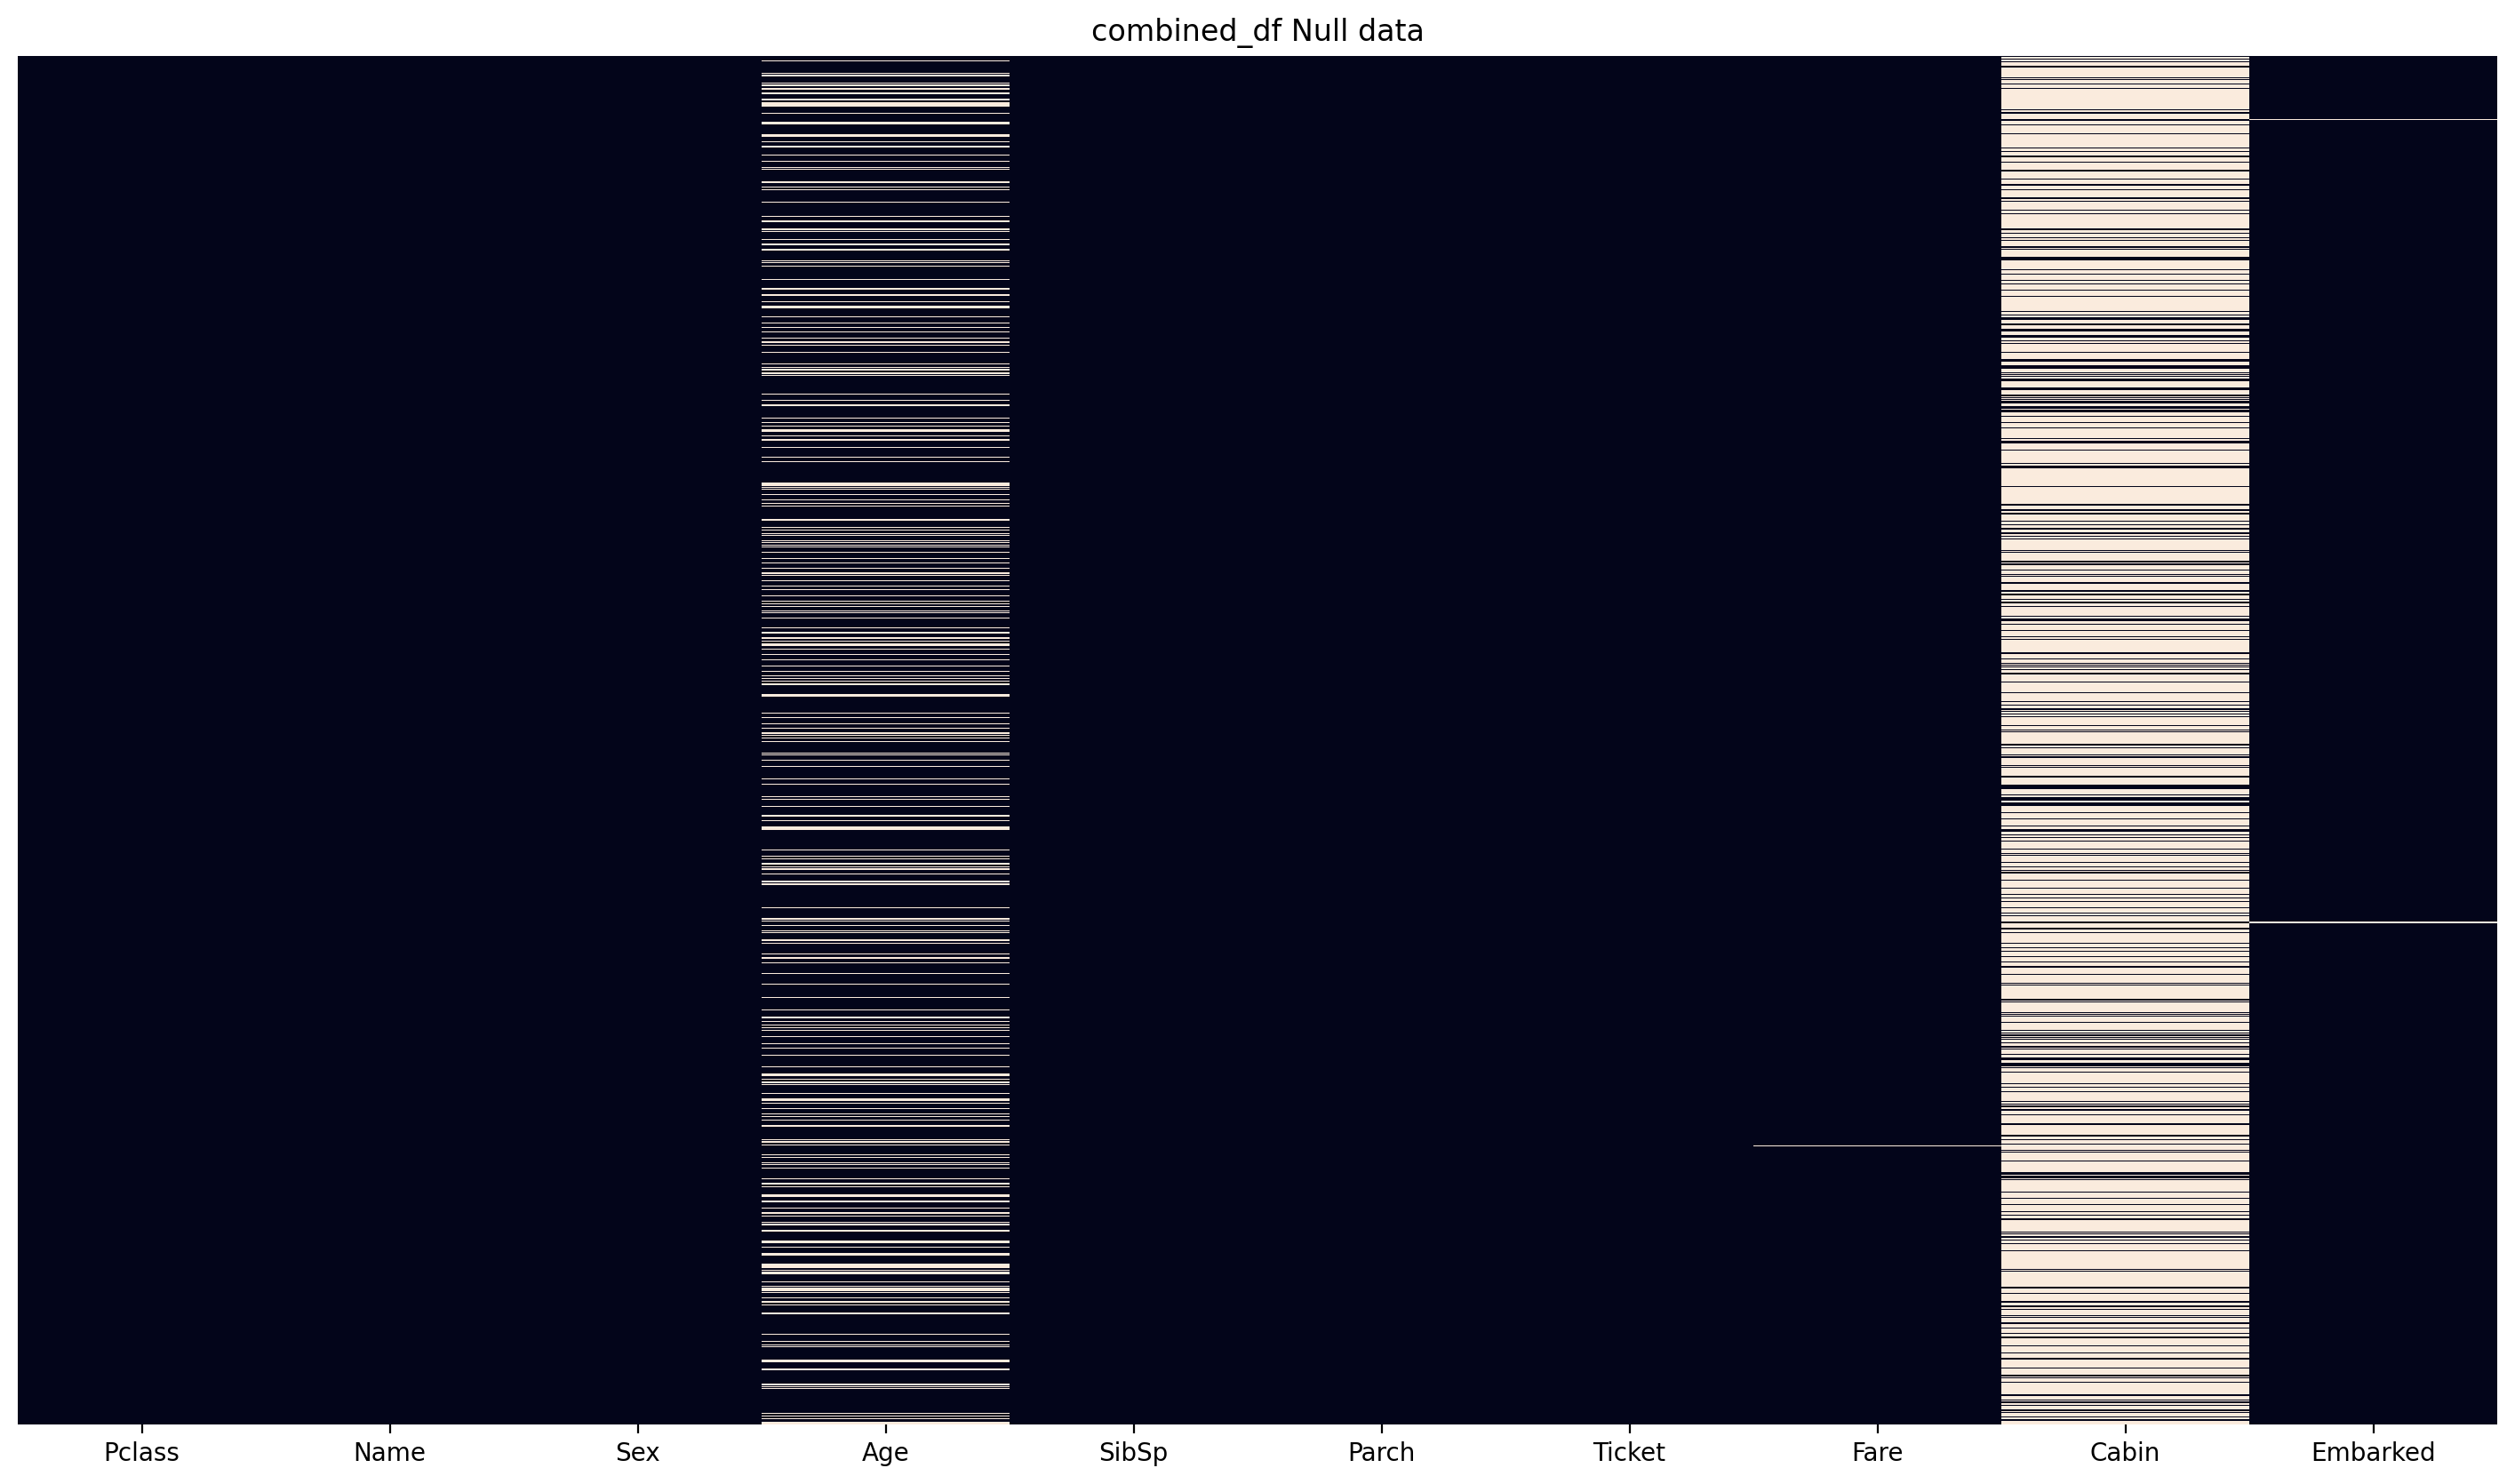

In [257]:
#Heat map before handling nans
fig, ax = plt.subplots(figsize = (18, 10))

# train data 
sns.heatmap(combined_df.isnull(), yticklabels=False, cbar=False)
ax.set_title('combined_df Null data');

### Imputing NaNs

## Embarked

In [258]:
combined_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [259]:
combined_df[combined_df.Embarked.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- Let's visualize to explore more

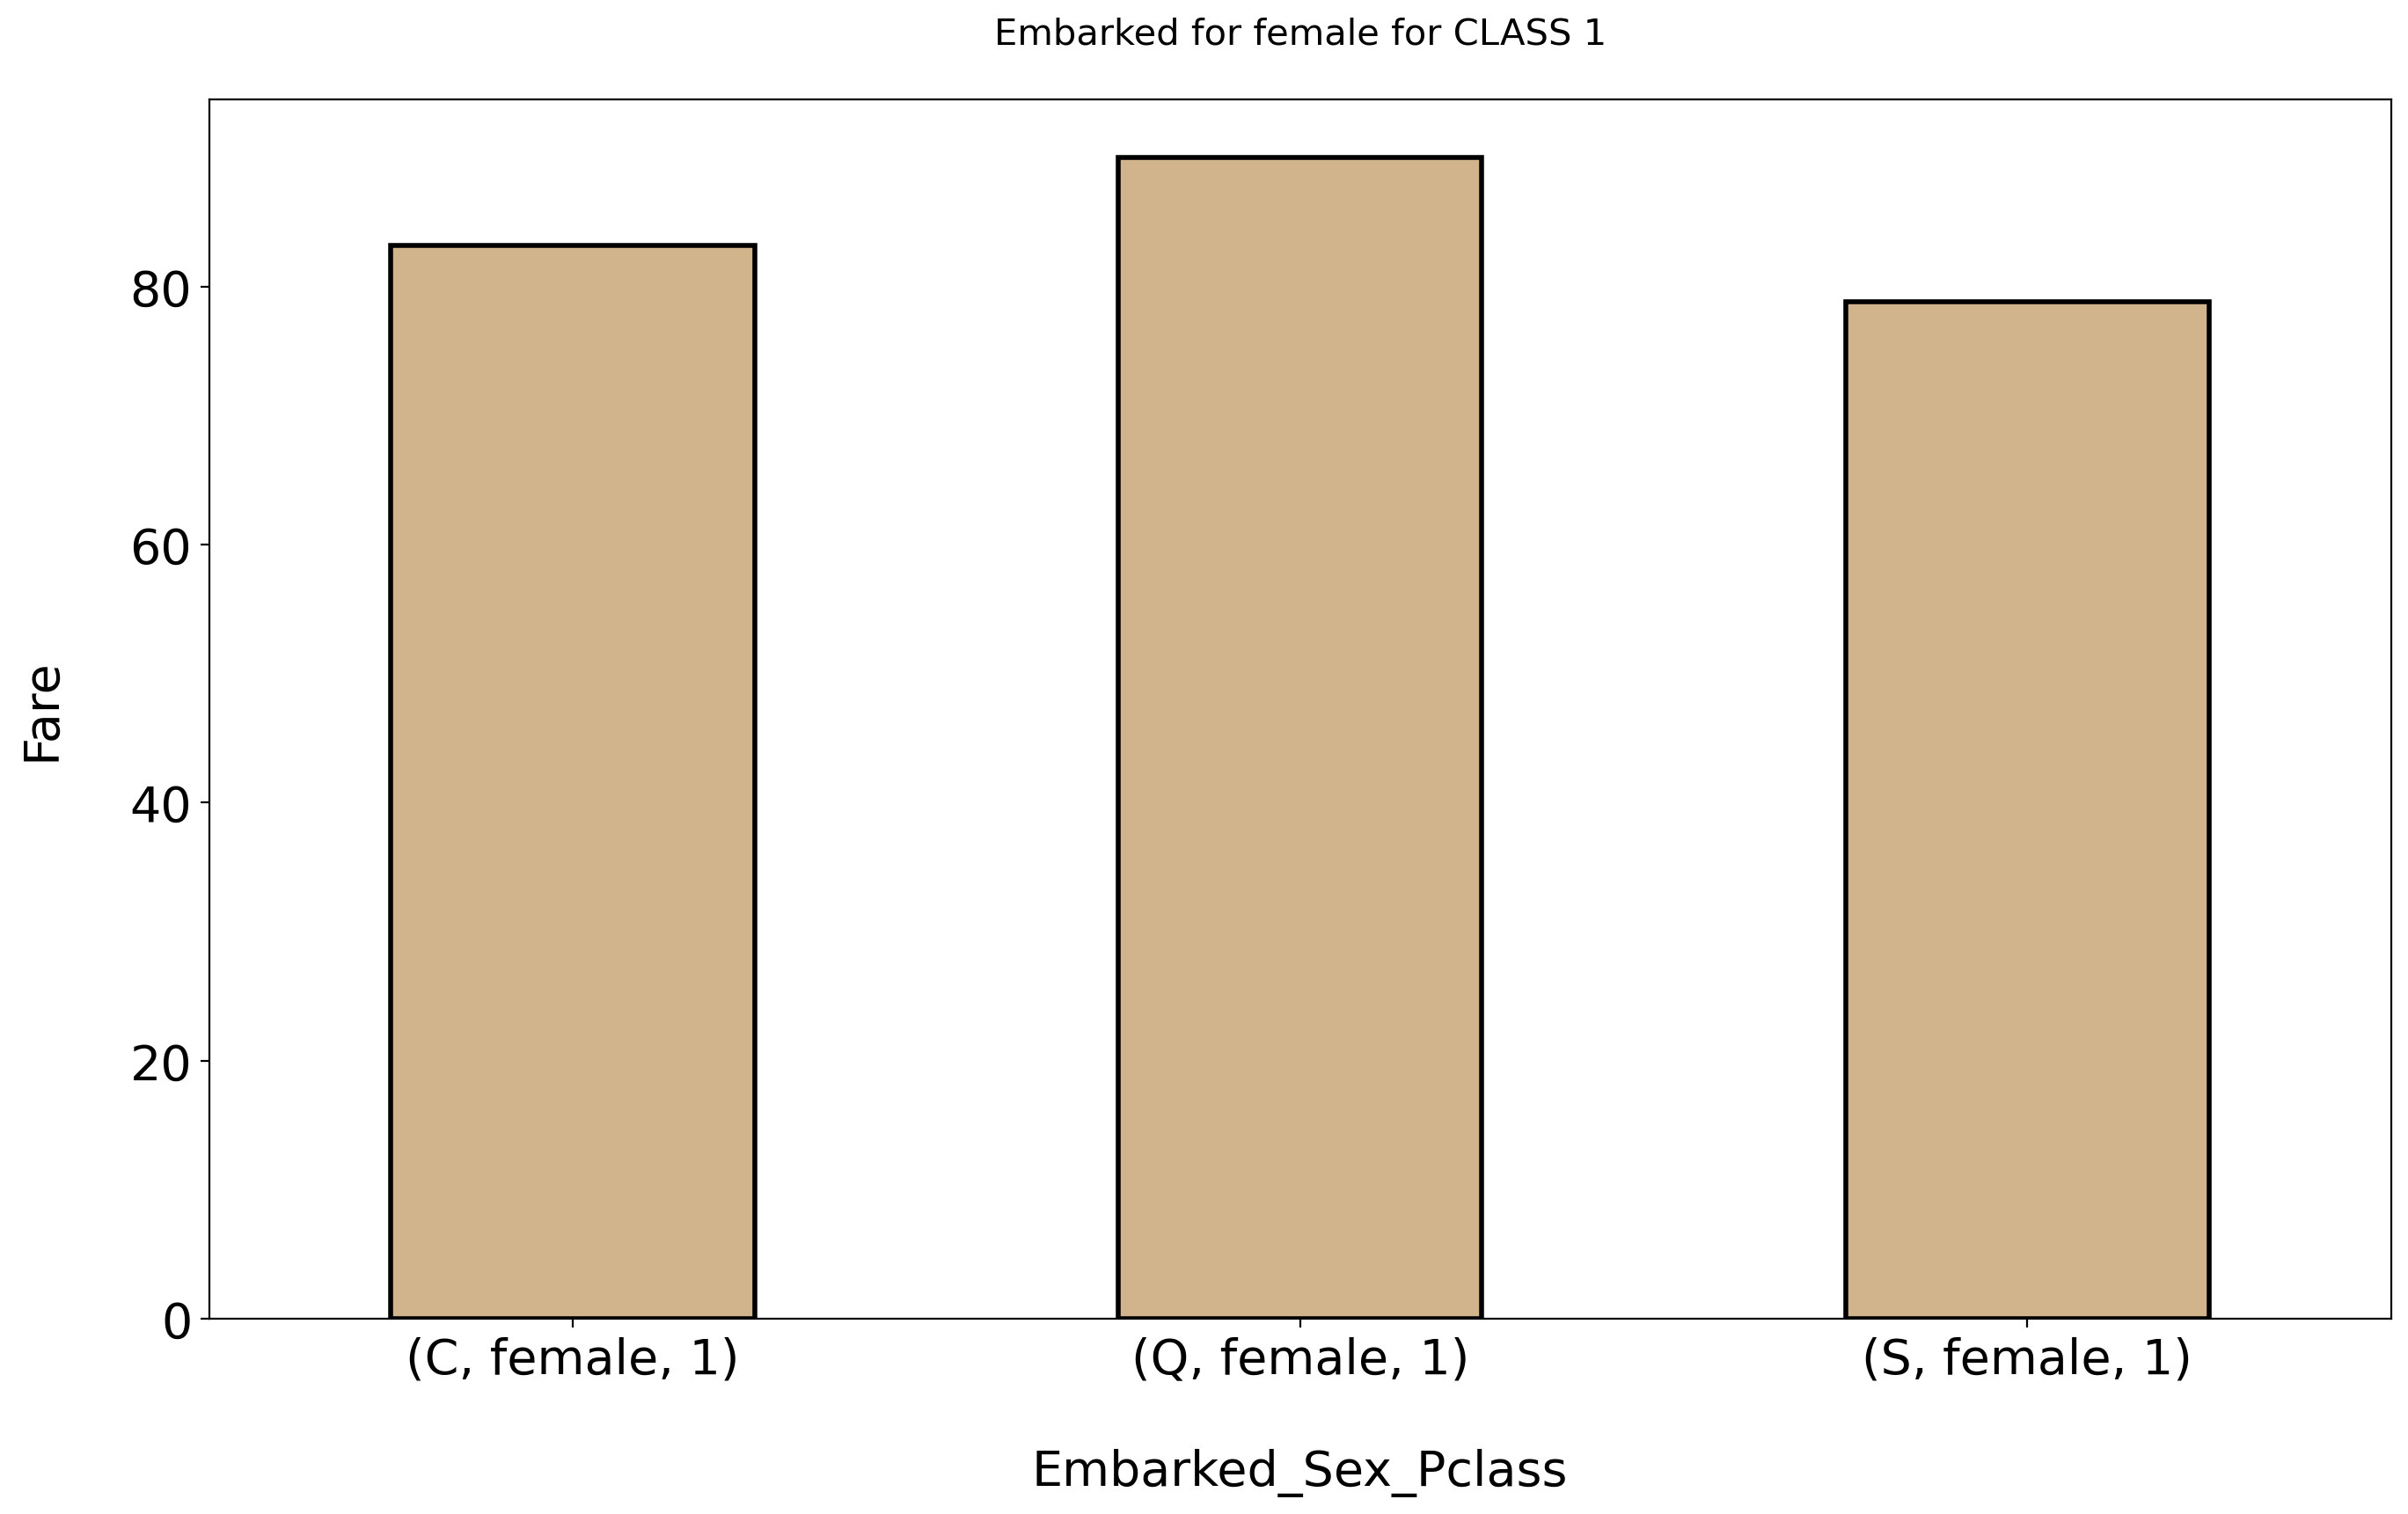

In [260]:
# Using a barplot to vizualize some columns. We can't label the missing data on 'S', 'C' or 'Q'. Let's try other way to do this.

#Get the Embarked for females with fare and calss
plot_embarked = combined_df.groupby(['Embarked','Sex','Pclass'])[['Fare']].median().reset_index()
plot_embarked = plot_embarked[plot_embarked.Sex =='female'][plot_embarked.Pclass ==1].sort_values('Fare')

# #Ploting
plt.figure(figsize=(16,9))
plot_embarked.groupby(['Embarked','Sex','Pclass'])['Fare'].median().plot(kind='bar',
                                                                         edgecolor='black',
                                                                         linewidth=2,
                                                                         color='tan');

#decoration
plt.xlabel('\nEmbarked_Sex_Pclass', fontsize=20)
plt.title('Embarked for female for CLASS 1\n', fontsize=15)
plt.ylabel('Fare\n', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20);

Let's check other features too.

In [261]:
#Show the relative features to the NaNs
train[train.Sex=='female'][train.Fare>=80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


- We found that both of missing data have the same Sex & same P_class & their Fare = 80.0000. So we explored females who paid 80 or more.
- We asume that they came from the same Embarked & the majority of Embarked = S 

In [262]:
combined_df['Embarked'].fillna(value='S', inplace=True)

In [263]:
combined_df['Embarked'].isnull().sum()

0

In [264]:
perc_nan(combined_df, combined_df.columns)

,No_NaN,Percent
Cabin,1014,77.463713
Age,263,20.091673
Fare,1,0.076394


---

## Cabin

In [265]:
#Sum of nans
combined_df.Cabin.isna().sum()

1014

In [266]:
#We have 1014 NaNs in Cabin, let's investigate it
combined_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- We have a lot of Cabins and it's not possiable to guess and fix all of the nulls since we have almost non unique valeus for cabins.
- We can make a new column that show if passenger has a cabin or not rather than drop the entire column.


In [267]:
combined_df['Has_Cabin'] = combined_df.Cabin.apply(lambda x: 1 if isinstance(x, str) else 0)

In [268]:
combined_df[['Cabin', 'Has_Cabin']].head(10)

,Cabin,Has_Cabin
0,NaN,0
1,C85,1
2,NaN,0
3,C123,1
4,NaN,0
5,NaN,0
6,E46,1
7,NaN,0
8,NaN,0
9,NaN,0


We can drop the columns now.

In [269]:
combined_df.drop('Cabin', axis=1, inplace=True)
combined_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Has_Cabin'],
      dtype='object')

----

## Age

In [270]:
combined_df.Age.isna().sum()

263

In [271]:
print('Age mode:  ',combined_df.Age.mode()[0])
print('Age median:',combined_df.Age.median())
print('Age mean:  ',combined_df.Age.mean())

Age mode:   24.0
Age median: 28.0
Age mean:   29.881137667304014


In [272]:
combined_df[combined_df.Age.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,0
19,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,0
26,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,0
28,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,0
29,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,0
31,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,1
32,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,0
36,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,0
42,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,0


We can replace the age with mean, median or mode. But Age is appeared as higher age is on higher class, and higher class survived more. But due to large number of NaNs and different Ages, we will use a model to predict the Age.

In [273]:
#Create a copy of combined_df
X_age = combined_df.copy(deep=True).reset_index()

#Select the features
X_age = X_age[["index","Pclass", "Age", "SibSp", "Parch", "Fare", "Has_Cabin"]]

#Drop na values
X_age.dropna(axis=0, inplace=True)

#Set target
y_Age = X_age.pop('Age')

#Print head
X_age.head()

,index,Pclass,SibSp,Parch,Fare,Has_Cabin
0,0,3,1,0,7.2500,0
1,1,1,1,0,71.2833,1
2,2,3,0,0,7.9250,0
3,3,1,1,0,53.1000,1
4,4,3,0,0,8.0500,0


In [274]:
'data', X_age.shape, 'target', y_Age.shape

('data', (1045, 6), 'target', (1045,))

In [275]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_age, y_Age, random_state=42)

In [276]:
#model
dt_Age = DecisionTreeRegressor(max_leaf_nodes=10)

#Fit
dt_Age.fit(X_train, y_train)

#Predict Age
age_pred = dt_Age.predict(X_test)

#I'm using RMSE to see the real diffence in age
print('RMSE =', np.sqrt(mean_squared_error(y_test, age_pred)))

RMSE = 11.322347724004334


Have a + or - 11 is better than fill it with same values.

In [277]:
#Get the NaNs dataframe where age is missing
X_age = combined_df.loc[combined_df["Age"].isnull()].reset_index()
X_age.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace =True)
X_age.head()

,index,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
0,5,3,NaN,0,0,8.4583,0
1,17,2,NaN,0,0,13.0000,0
2,19,3,NaN,0,0,7.2250,0
3,26,3,NaN,0,0,7.2250,0
4,28,3,NaN,0,0,7.8792,0


In [278]:
#drop the Age because of NaNs
X_age.drop('Age', axis=1, inplace=True)

#Predicting the age
X_age["Age"] = dt_Age.predict(X_age)

#Print head
X_age.head()

,index,Pclass,SibSp,Parch,Fare,Has_Cabin,Age
0,5,3,0,0,8.4583,0,27.807273
1,17,2,0,0,13.0000,0,33.276000
2,19,3,0,0,7.2250,0,27.807273
3,26,3,0,0,7.2250,0,27.807273
4,28,3,0,0,7.8792,0,27.807273


In [279]:
pred_age = [X_age.Age]

In [280]:
combined_df.Age[combined_df.Age.isna()] = pred_age

In [281]:
combined_df.Age.isna().sum()

0

Done, we predict the age and fill it with the same index as it should be.

---

## Fare

In [282]:
combined_df.Fare.isna().sum()

1

In [283]:
print('Age mode:  ',combined_df.Fare.mode()[0])
print('Age median:',combined_df.Fare.median())
print('Age mean:  ',combined_df.Fare.mean())

Age mode:   8.05
Age median: 14.4542
Age mean:   33.2954792813456


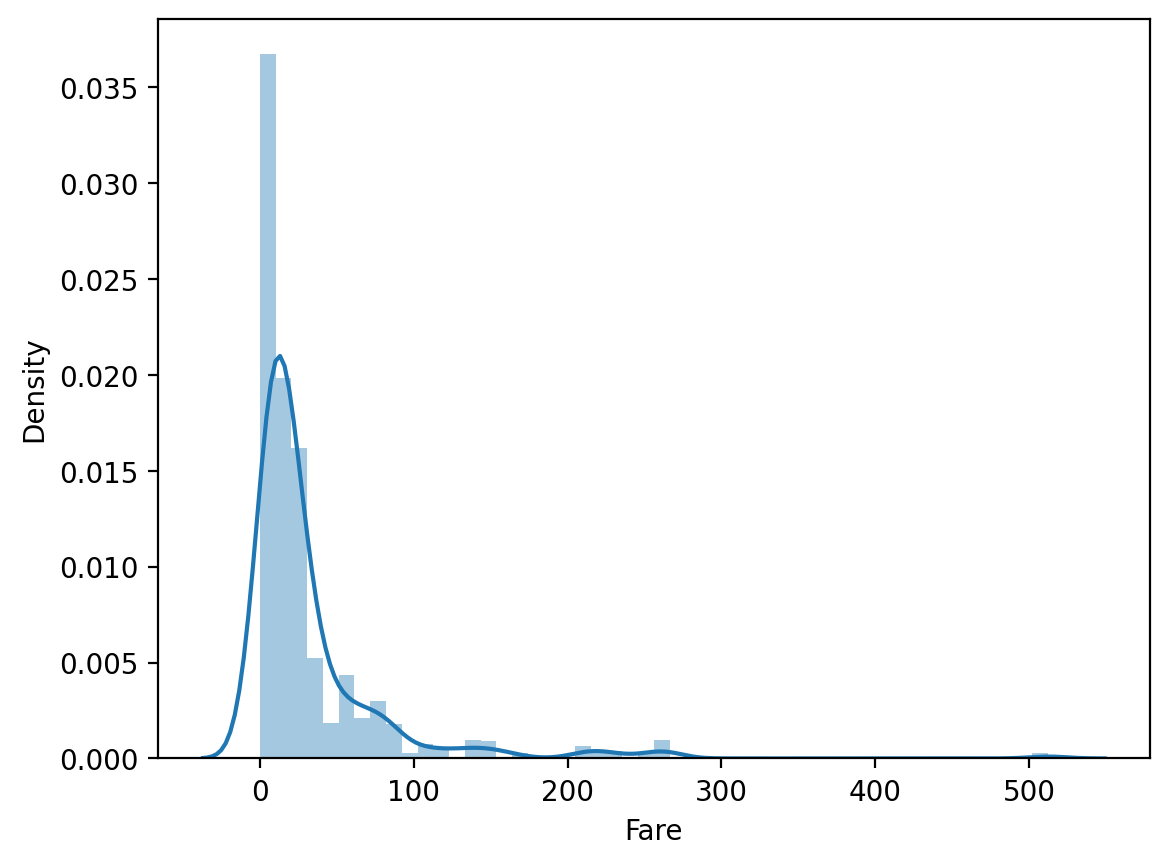

In [284]:
sns.distplot(combined_df.Fare);

Since it's left skewed it's better to take the mode.

In [285]:
combined_df.Fare.fillna(value=combined_df.Fare.mode()[0], inplace=True)

In [286]:
combined_df.Fare.isna().sum()

0

In [287]:
perc_nan(combined_df, combined_df.columns)

,No_NaN,Percent


Let's plot the heatmap also

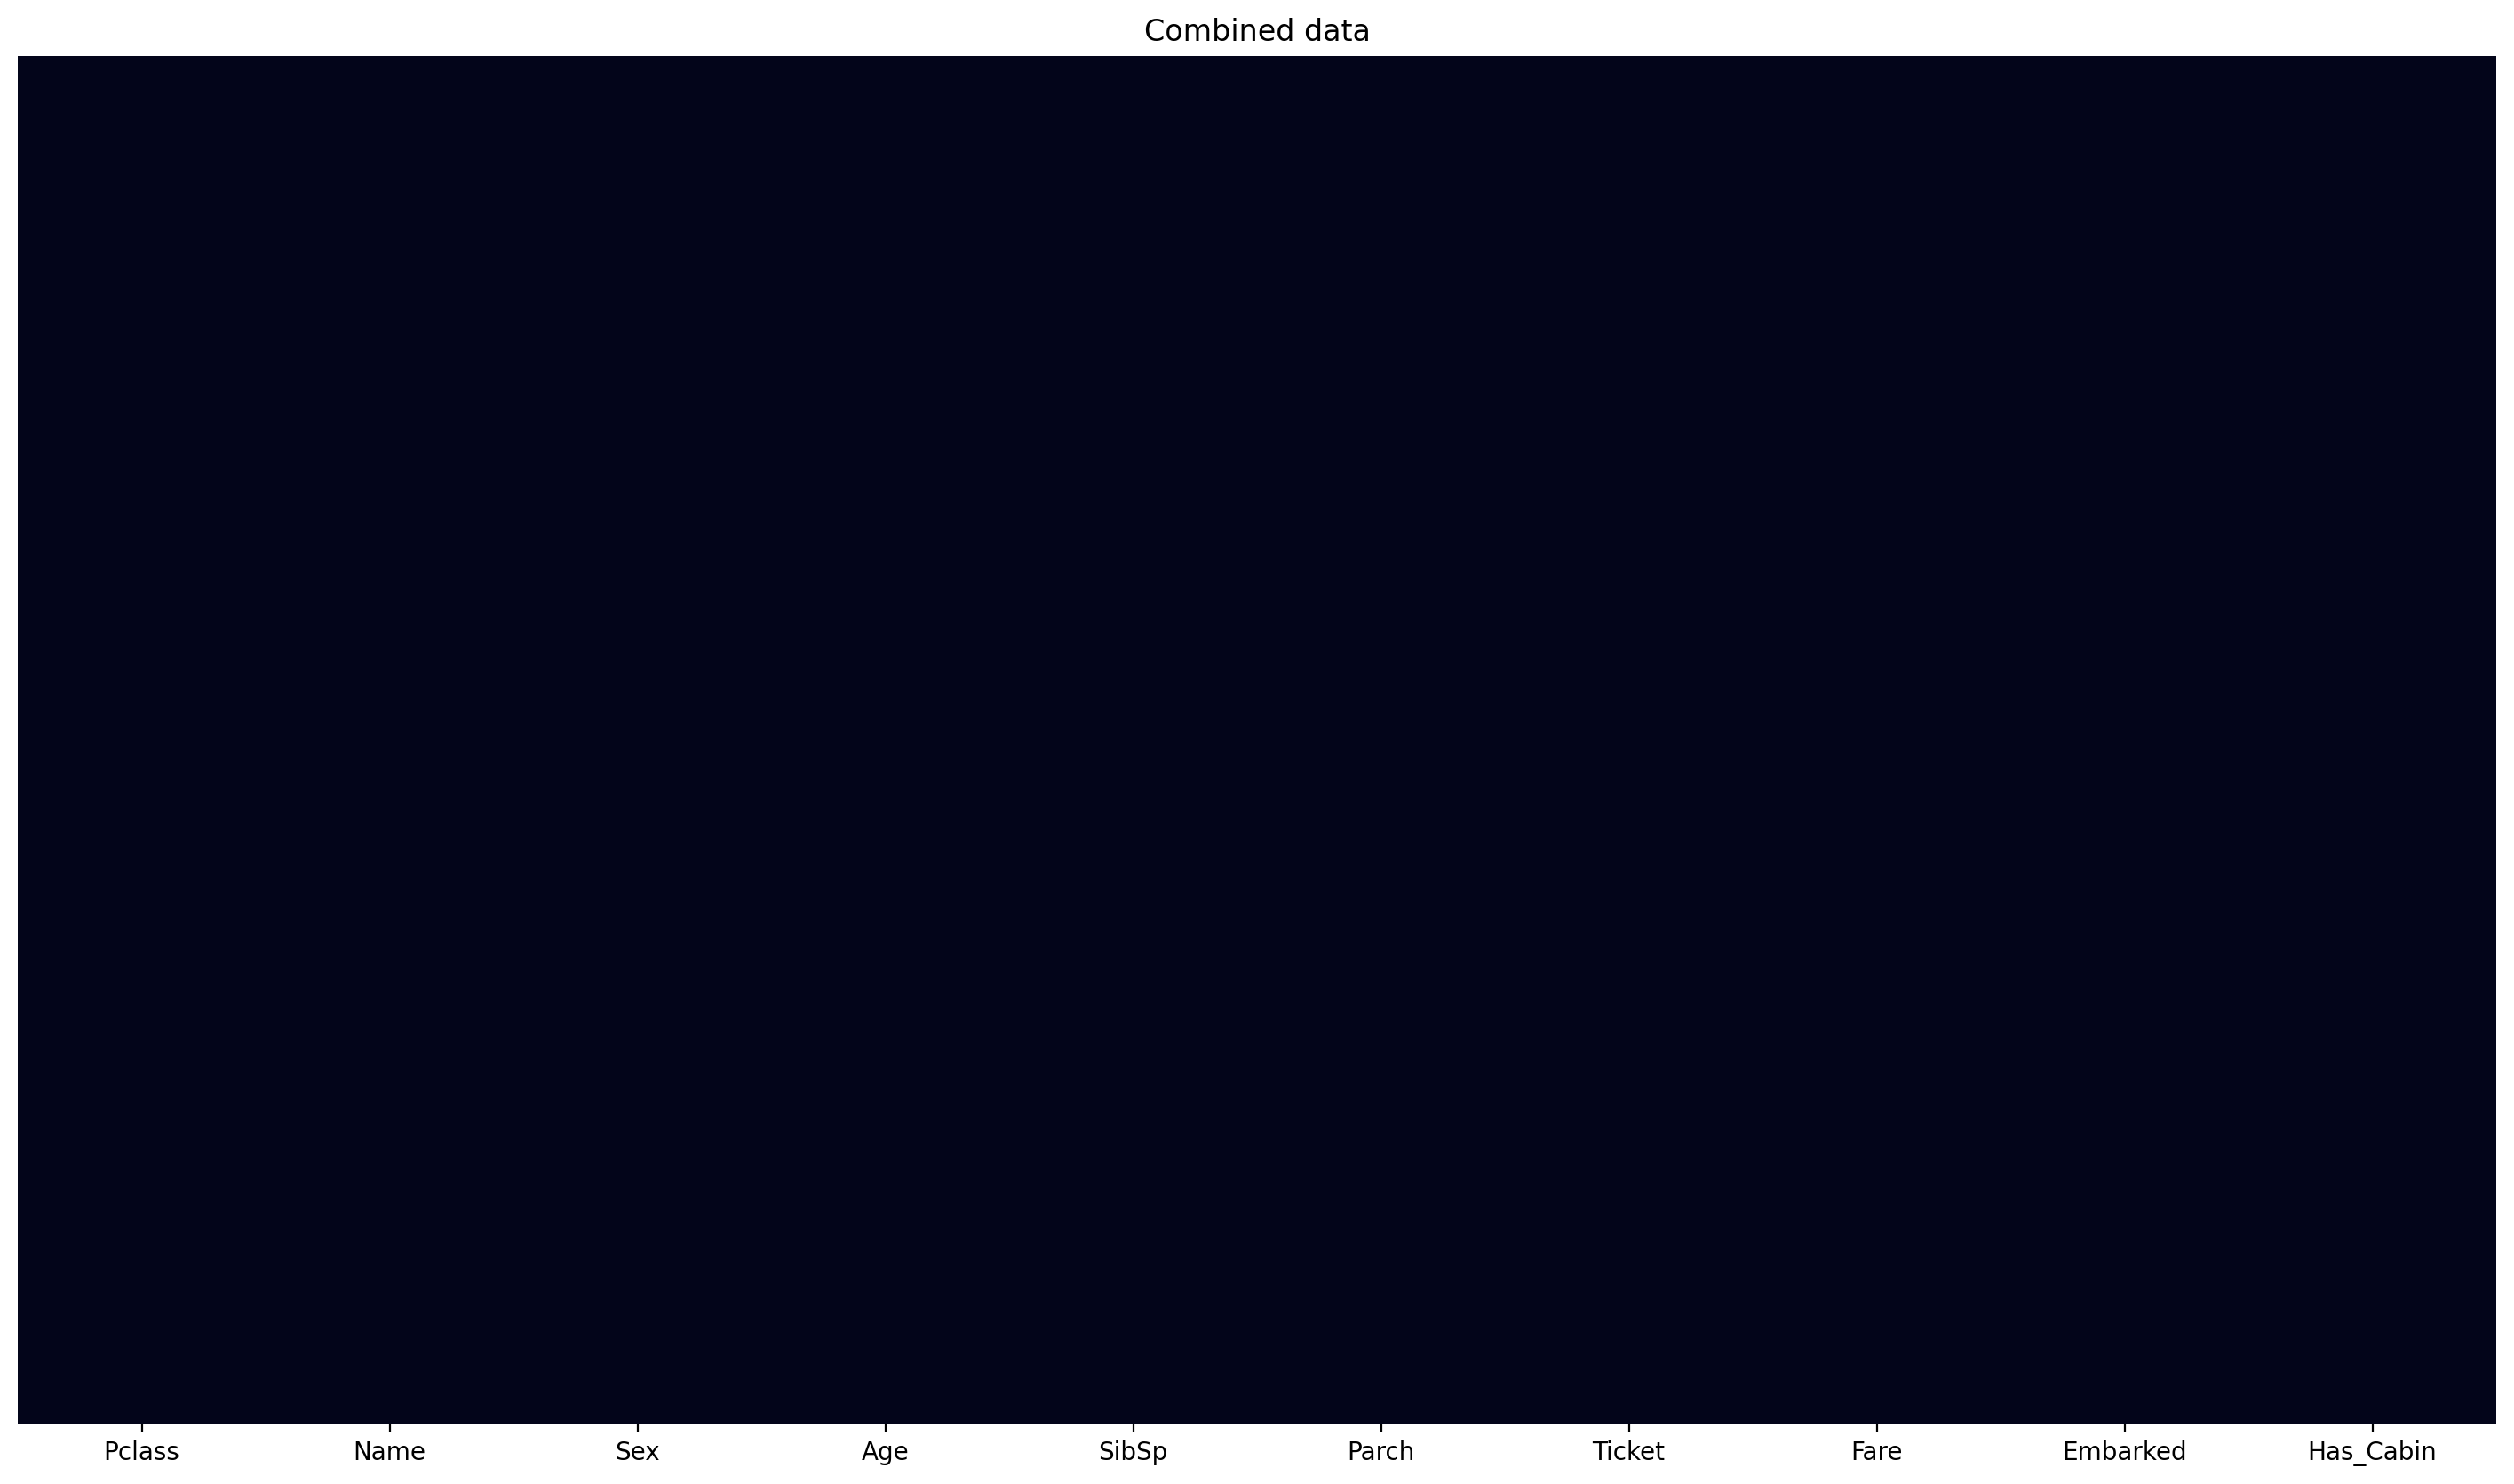

In [288]:
#Heat map before handling nans
fig, ax = plt.subplots(figsize = (18, 10))

# train data 
sns.heatmap(combined_df.isnull(), yticklabels=False, cbar=False)
ax.set_title('Combined data');

---

# Drop columns

In [289]:
#Drop name and ticket
combined_df.drop(['Name','Ticket'], axis=1,inplace=True)

-----

# New features

In [290]:
combined_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [291]:
#Indicate if he has Sib or not
combined_df['With_SibSp'] = combined_df.SibSp.map(lambda x: 1 if x > 0 else 0)

In [292]:
#Indicate if he is with parent and child or not
combined_df['With_Parent'] = combined_df.Parch.map(lambda x: 1 if x > 0 else 0)

In [293]:
combined_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,With_SibSp,With_Parent
0,3,male,22.0,1,0,7.2500,S,0,1,0
1,1,female,38.0,1,0,71.2833,C,1,1,0
2,3,female,26.0,0,0,7.9250,S,0,0,0
3,1,female,35.0,1,0,53.1000,S,1,1,0
4,3,male,35.0,0,0,8.0500,S,0,0,0


---

# Dummy

In [294]:
#take copy of data (no need for it) you can do dummies directily
combined_df_dummy = combined_df.copy(deep=True)
combined_df_dummy = pd.get_dummies(combined_df_dummy)

In [295]:
combined_df_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,With_SibSp,With_Parent,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,0,1,0,0,1


---

## Split the dataset back

In [296]:
# Split the dataset back to train and test
survive_lim = len(y) #len of the target

train_df = combined_df_dummy[:survive_lim] #take all rows till len of y
test_df = combined_df_dummy[survive_lim:] #take from len of y to the end

In [297]:
#Add target to the train
train_df['Survived'] = y

In [298]:
train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,With_SibSp,With_Parent,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,1,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,0,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,1,0,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,0,0,0,1,0,0,1,0


In [299]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,With_SibSp,With_Parent,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,3,34.5,0,0,7.8292,0,0,0,0,1,0,1,0
892,3,47.0,1,0,7.0000,0,1,0,1,0,0,0,1
893,2,62.0,0,0,9.6875,0,0,0,0,1,0,1,0
894,3,27.0,0,0,8.6625,0,0,0,0,1,0,0,1
895,3,22.0,1,1,12.2875,0,1,1,1,0,0,0,1


In [300]:
train.shape, test.shape

((891, 12), (418, 11))

In [301]:
train_df.shape, test_df.shape

((891, 14), (418, 13))

In [302]:
#Write it to csv
train_df.to_csv("../data/titanic/train_cleaned.csv", index=False)

In [303]:
#Write it to csv
test_df.to_csv("../data/titanic/test_cleaned.csv", index=False)

---

# Mdoeling

## Read the data

In [304]:
#read data
train = pd.read_csv('../data/titanic/train_cleaned.csv')
test = pd.read_csv('../data/titanic/test_cleaned.csv')

#Read submission file
submission = pd.read_csv("../data/titanic/gender_submission.csv")

In [305]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,With_SibSp,With_Parent,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,1,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,0,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,1,0,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,0,0,0,1,0,0,1,0


In [306]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,With_SibSp,With_Parent,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,1,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,1,1,1,0,0,0,1


## Predictors and Target

In [307]:
# get the target and transform it check the link above 
y = train.pop('Survived')
X = train

## Standarization

In [308]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)
test_s = scaler.fit_transform(test)

In [309]:
def cv_score_model(models, X, y):
    for name, model in models:
        #Select model
        current_model = model
        
        #Crate Kfold repeated
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        
        #Cross score
        scores = cross_val_score(current_model, X, y, scoring='accuracy', cv=cv, n_jobs=8)
        
        #Print score
        print(f'{name} Means Accuracy = {scores.mean()}\n')

In [310]:
models = [['DecisionTreeClassifier', DecisionTreeClassifier()],
          ['RandomForestClassifier', RandomForestClassifier()],
          ['ExtraTreesClassifier', ExtraTreesClassifier()],
          ['KNeighborsClassifier', KNeighborsClassifier()],
          ['svc', svm.SVC(kernel='linear')],
          ['XGBClassifier', XGBClassifier()]]

In [311]:
#Print the CV score for all models
cv_score_model(models, X_train, y)

DecisionTreeClassifier Means Accuracy = 0.7889887640449439

RandomForestClassifier Means Accuracy = 0.8151685393258425

ExtraTreesClassifier Means Accuracy = 0.7934873075322514

KNeighborsClassifier Means Accuracy = 0.798689138576779

svc Means Accuracy = 0.7901206824802329

XGBClassifier Means Accuracy = 0.8069080316271328



In [312]:
scores = pd.DataFrame(columns=['score'])

----

## DecisionTreeClassifier

In [313]:
dt = DecisionTreeClassifier()

In [314]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [100,150,200,300,400,1000],
              'splitter': ['best', 'random']
             }

In [315]:
#GridSearch DT
dt_gs = GridSearchCV(estimator=dt,
                     param_grid=param_grid,
                     verbose=1,
                     n_jobs=8)

dt_gs.fit(X, y)

dt_gs.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 105 out of 120 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.0s finished


{'criterion': 'entropy', 'max_depth': 200, 'splitter': 'random'}

In [316]:
dt = dt_gs.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=200, splitter='random')

In [317]:
dt_prediction = dt.predict(test)

In [318]:
#Write submission
submission.iloc[:,1] = dt_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/dt_prediction.csv', index=False)

In [319]:
scores.loc['DecisionTreeClassifier'] = 0.74162

## RandomForestClassifier

In [320]:
#Params dict
param_grid ={'n_estimators': [200, 400, 600, 800],
             'max_features':['sqrt',.6, .8, 1],
             'max_depth': [2, 4, 8, 10],
             'max_samples':[.4, .5, .6],
             'bootstrap':[True,False]} 

In [321]:
#Grid RF search
rf_gs = GridSearchCV(RandomForestClassifier(),
                     param_grid = param_grid ,
                     verbose = 1,
                     scoring = 'accuracy',
                     n_jobs = 8)

#fit
rf_gs.fit(X_train, y)

#params
rf_gs.get_params()

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   11.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   27.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   51.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 1920 out of 1920 | elapsed:  2.1min finished


{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'iid': 'deprecated',
 'n_jobs': 8,
 'param_grid': {'n_estimators': [200, 400, 600, 800],
  'max_features': ['sqrt', 0.6, 0.8, 1],
  'max_depth': [2, 4, 8, 10],
  'max_samples': [0.4, 0.5, 0.6],
  'bootstrap': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'retur

In [322]:
rf = rf_gs.best_estimator_
rf

RandomForestClassifier(max_depth=10, max_features=0.8, max_samples=0.4,
                       n_estimators=400)

In [323]:
rf_prediction = rf.predict(test_s)

In [324]:
#Write submission
submission.iloc[:,1] = rf_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/rf_prediction.csv', index=False)

In [325]:
scores.loc['RandomForestClassifier'] = 0.78708

-----

## ExtraTreesClassifier

In [ ]:
param_grid = {'n_estimators': [100, 150, 200, 250],
             'max_features':['sqrt', .5, 1],
             'max_depth': [2, 4, 8, None],
             'max_samples':[.5, 1],
             'bootstrap':[True, False]
            }

In [ ]:
#Grid et search
et_gs = GridSearchCV(ExtraTreesClassifier(),
                     param_grid = param_grid ,
                     verbose = 1,
                     scoring = 'accuracy',
                     n_jobs = 8)

#fit
et_gs.fit(X, y)

#params
et_gs.get_params()

In [ ]:
et = et_gs.best_estimator_
et

In [ ]:
et_prediction = et.predict(test)

In [ ]:
#Write submission
submission.iloc[:,1] = et_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/et_prediction.csv', index=False)

In [ ]:
scores.loc['ExtraTreesClassifier'] = 0.77272

---

## KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors' : list(range(1, 20)),
              'algorithm': ['ball_tree','kd_tree','brute','auto'],
              'metric':['euclidean','manhattan','minkowski']
             }

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid = param_grid,
                        verbose = 1,
                        n_jobs = 8,
                        scoring='accuracy')

#fit
knn_grid.fit(X_train, y)

#params
knn_grid.get_params()

In [ ]:
knn = knn_grid.best_estimator_
knn

In [ ]:
knn_prediction = knn.predict(test_s)

In [ ]:
#Write submission
submission.iloc[:,1] = knn_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/knn_prediction.csv', index=False)

In [ ]:
scores.loc['KNeighborsClassifier'] = 0.75837

----

## SVC

In [ ]:
param_grid = {'kernel':['linear','rbf'],
              'C':[1,10,100],
              'gamma':[1,0.1,0.001]
             }

In [ ]:
svc_grid = GridSearchCV(svm.SVC(),
                        param_grid = param_grid,
                        verbose = 1,
                        n_jobs = 8,
                        scoring='accuracy')

#fit
svc_grid.fit(X_train, y)

#params
svc_grid.get_params()

In [ ]:
svc = svc_grid.best_estimator_
svc

In [ ]:
svc_prediction = svc.predict(test_s)

In [ ]:
#Write submission
submission.iloc[:,1] = svc_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/svc_prediction.csv', index=False)

In [ ]:
scores.loc['SVC'] = 0.77033

----

## XGBClassifier

In [ ]:
#All value for hyperparameters extracted by GridSearch not the best but it give good results.
xgb = XGBClassifier(colsample_bytree=0.25,
                   gamma=0.0,
                   learning_rate=0.02,
                   max_depth=4,
                   n_estimators=1000,
                   n_jobs=8,
                   reg_alpha=0.25,
                   reg_lambda=0.40,
                   subsample=1.0)

xgb.fit(train, y)

In [ ]:
xgb_prediction = xgb.predict(test)

In [ ]:
xgb_prediction = xgb.predict(test)
#Write submission
submission.iloc[:,1] = xgb_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/xgb_prediction.csv', index=False)

In [ ]:
scores.loc['XGBClassifier'] = 0.77033

In [327]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(rf, n_estimators=10, learning_rate=0.6)
adb.fit(X_train, y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                         max_features=0.8,
                                                         max_samples=0.4,
                                                         n_estimators=400),
                   learning_rate=0.6, n_estimators=10)

In [328]:
adb_prediction = adb.predict(test_s)
#Write submission
submission.iloc[:,1] = adb_prediction

#Write to csv for submission
submission.to_csv('../data/titanic/adb_prediction.csv', index=False)

---

# Plot scores on Kaggle for all models

In [ ]:
scores.sort_values('score', inplace=True)

# plt.figure(figsize=(15,8))
sns.barplot(data = scores,
            x= scores.index,
            y= 'score',
            orient='v',
            palette='Set2',
            edgecolor='black')

#Print each value for each bar
for index, value in enumerate(scores.score):
    plt.text(index,
             value,
             value,
             fontdict={'size':10, 'color':'black'},
             ha='center',
             va='bottom')

#Decoration
plt.xticks(fontsize=10, rotation = 30, horizontalalignment='right')
plt.yticks(fontsize=10)
plt.xlabel('\nMdoels', fontsize=10)
plt.ylabel('Accuracy\n', fontsize=10);
plt.title('Kaggle Accuracy\n', fontsize=10 );

As we can see RandomForest has the best accuracy on Kaggle. And we use it as our model and tried to enhance it.

---

# Kaggle Submission

This is our final score for last submission after enhancing RF and do some FE again.

![](../assets/images/titanic_final_score.png)